# Evaluation of the manually assigned keywords in the Spectators (part 2)
In the second part of the subject evaluation process, we will load the pickle file created using the previous notebook, to evaluate and visualize the manually assigned keywords. 

In [1]:
import pandas as pd
import random
import collections
import colored
import numpy as np
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib as cm
import matplotlib.patches as mpatches

In [2]:
output = 'Y:/data/projekte/dispecs/topicModeling/output/DataEvaluation/'

## Load the pickled data frame

In [3]:
df = pd.read_pickle(output+"file_infos.pkl")
df

,id,periodical,lang,keywords
0,o:mws-08C-20,Il Filosofo alla Moda,Italian,Autopoetical Reflection
1,o:mws-08C-21,Il Filosofo alla Moda,Italian,Image of Women; Manners and Customs
2,o:mws-08C-22,Il Filosofo alla Moda,Italian,Reason
3,o:mws-08C-23,Il Filosofo alla Moda,Italian,Superstition
4,o:mws-08C-24,Il Filosofo alla Moda,Italian,Structure of Society
5,o:mws-08C-25,Il Filosofo alla Moda,Italian,Idea of Man
6,o:mws-08C-26,Il Filosofo alla Moda,Italian,Idea of Man
7,o:mws-08C-27,Il Filosofo alla Moda,Italian,Image of Women; Fashion
8,o:mws-08C-28,Il Filosofo alla Moda,Italian,Idea of Man
9,o:mws-08C-29,Il Filosofo alla Moda,Italian,Structure of Society


## Evaluate the periodicals, languages, and keywords

In [4]:
# list all keywords
l = df['keywords'].tolist()
keywords = []
for keyword in l:
    if ';' in keyword:
        splited = keyword.split('; ')
        for split in splited:
            keywords.append(split)
    else:
        keywords.append(keyword)


In [5]:
def get_keywords(keywords):
    """Makes a keywords dictionary with keywords as keys and numbers of occurrences as values."""
    d = dict(zip(keywords, [0] * len(keywords)))
    for k in keywords:
        d[k] += 1
    return d

In [6]:
# create a dictionary
d_all_keywords = get_keywords(keywords)
# sort the dictionary by values
d_all_keywords = collections.OrderedDict(sorted(d_all_keywords.items(), key=lambda x:x[1], reverse=True)) 
print("Number of keyword assignments: ",len(keywords))
print("Number of unique keywords: ",len(set(keywords)), '\n')
print("Number of assignments per keyword:\n")
for k in d_all_keywords:
    print(k, ':', d_all_keywords[k])

Number of keyword assignments:  7861
Number of unique keywords:  38 

Number of assignments per keyword:

Idea of Man : 1118
Theatre Literature Arts : 947
Image of Women : 613
Autopoetical Reflection : 430
Manners and Customs : 416
Religion : 390
Love : 380
Morale : 339
Philosophy : 299
Education and Formation : 278
Image of Men : 221
Fashion : 198
Structure of Society : 188
Reason : 165
Politics : 162
Happiness : 159
Science : 154
Culture of Conversation : 145
Family : 133
Law : 130
Economy : 116
Passion : 107
France : 102
Charity : 99
Other Countries : 87
Nature : 87
England : 83
Critics on Nobility : 78
Superstition : 52
Spain : 52
Italy : 48
Foreign Societies : 43
Germany : 19
America (West India) : 11
Friendship : 5
Switzerland : 4
Apologetic of Spain : 2
Austria : 1


In [7]:
def get_periodical_terms(periodical_name):
    """
    Gets all terms that were manually assigned to a specific periodical.
    """
    mask_periodical = df.loc[df['periodical'] == periodical_name]
    mask_list = mask_periodical['keywords'].tolist() 
    periodical_terms = []
    for term in mask_list:
        if ';' in term:
            splited = term.split('; ')
            for split in splited:
                periodical_terms.append(split)
        else:
            periodical_terms.append(term)

    d = dict(zip(periodical_terms, [0] * len(periodical_terms)))
    for k in periodical_terms:
        d[k] += 1
    return d

In [8]:
# make a dictionary for a specific periodical, ordered by value 
periodical_name = "Il Filosofo alla Moda" #Le Spectateur français, ou Journal des moeurs #Le Spectateur français ou Journal des Mœurs
d_periodical = get_periodical_terms(periodical_name)
d_periodical = collections.OrderedDict(sorted(d_periodical.items(), key=lambda x:x[1], reverse=True))
print(len(d_periodical), 'keywords are assigned to the periodical', periodical_name)
print('Number of assignments per keyword:\n')
for k in d_periodical:
    print(k, ':', d_periodical[k])

30 keywords are assigned to the periodical Il Filosofo alla Moda
Number of assignments per keyword:

Idea of Man : 147
Image of Women : 56
Morale : 53
Theatre Literature Arts : 49
Autopoetical Reflection : 34
Religion : 30
Love : 27
Image of Men : 24
Manners and Customs : 20
Reason : 20
Culture of Conversation : 18
Fashion : 17
Structure of Society : 13
Education and Formation : 13
Nature : 13
Happiness : 12
Charity : 10
Critics on Nobility : 7
Philosophy : 7
Science : 6
Family : 6
Economy : 5
Superstition : 4
England : 4
Passion : 4
Politics : 3
Other Countries : 3
America (West India) : 2
Foreign Societies : 1
Law : 1


In [9]:
def get_periodicals_with_term(term):
    """
    Gets all periodicals with a specific keyword and the number of occurrences of that keyword in each periodical.
    """
    if "(" in term: 
        term=term.replace('(', '\(').replace(')', '\)')
        
    mask_terms = df[df["keywords"].str.contains(term)]
    mask_list = mask_terms['periodical'].tolist()
    d = dict(zip(mask_list, [0] * len(mask_list)))
    for k in mask_list:
        d[k] += 1
    return d

In [12]:
term = 'Theatre Literature Arts'
d_keyword = get_periodicals_with_term(term)
d_keyword = collections.OrderedDict(sorted(d_keyword.items(), key=lambda x:x[1], reverse=True))
print('The keyword', term, 'is assigned to', len(d_keyword), 'periodicals.')
print('Number of assignments per periodical:\n')
for k in d_keyword:
    print(k, ':', d_keyword[k])

The keyword Theatre Literature Arts is assigned to 56 periodicals.
Number of assignment per periodical:

Gazzetta urbana veneta : 118
La Bigarure : 84
Le Spectateur ou le Socrate moderne : 65
El Regañón general : 54
Il Filosofo alla Moda : 49
Gazzetta veneta : 46
Le Misantrope : 39
La Bagatelle : 38
La Frusta Letteraria di Aristarco Scannabue : 31
Le Nouveau Spectateur : 31
Le Mentor moderne : 25
La donna galante ed erudita : 24
El Censor : 22
Lo Spettatore italiano : 22
La Spectatrice danoise, ou l'Aspasie moderne : 22
El Pensador : 21
Le Monde comme il est : 21
Le Philosophe Nouvelliste : 20
L’Osservatore veneto : 19
El Corresponsal del Censor : 17
Le Nouveau Spectateur français : 17
Gli Osservatori veneti : 17
El Apologista Universal : 12
Lo Spettatore italiano-piemontese : 10
Le Spectateur français avant la Révolution : 10
Le Spectateur inconnu : 8
Le Spectateur françois, ou Journal des Mœurs : 8
Le Monde : 8
El Escritor sin título : 7
Le Cabinet du Philosophe : 7
El Argonauta espa

In [14]:
def get_periodicals_with_language(language):
    """
    Gets all periodicals with a specific keyword and the number of occurrences of that keyword in each periodical.
    """
    mask_language =  df.loc[df['lang'] == language]
    mask_list = mask_language['periodical'].tolist()
    d = dict(zip(mask_list, [0] * len(mask_list)))
    for k in mask_list:
        d[k] += 1
    return d

In [24]:
language = 'French'
d_lang = get_periodicals_with_language(language) #Spanish; Castilian
d_lang = collections.OrderedDict(sorted(d_lang.items(), key=lambda x:x[1], reverse=True))
print("The corpus contains", len(d_lang), "periodicals in", language)
print("Number of issues per periodical:\n")
for k in d_lang:
    print(k, ':', d_lang[k])

The corpus contains 25 periodicals in French
Number of issues per periodical:

Le Spectateur ou le Socrate moderne : 428
La Bigarure : 197
Le Mentor moderne : 146
Le Nouveau Spectateur : 119
La Bagatelle : 100
Le Misantrope : 92
La Spectatrice danoise, ou l'Aspasie moderne : 83
Le Philosophe Nouvelliste : 73
Le Spectateur français avant la Révolution : 63
Le Monde comme il est : 59
Le Nouveau Spectateur français : 55
Le Censeur ou Caractères des Mœurs de la Haye : 44
Le Spectateur françois pendant le gouvernement révolutionnaire : 35
Le Monde : 34
Le Spectateur françois : 26
La Spectatrice. Ouvrage traduit de l'anglois : 25
Le Spectateur françois ou le nouveau Socrate moderne : 18
La Spectatrice : 15
Le Spectateur françois, ou Journal des Mœurs : 15
Le Cabinet du Philosophe : 11
Le Spectateur inconnu : 8
L'Indigent philosophe ou l'homme sans souci : 7
Le Spectateur suisse : 2
Les Chiffons : 2
Le Spectateur moderne : 1


In [25]:
# Keywords in periodicals of a certain language
mask_lang = df.loc[df['lang'] == language]
l = mask_lang['keywords'].tolist()
lang_keywords = []
for keyword in l:
    if ';' in keyword:
        splited = keyword.split('; ')
        for split in splited:
            lang_keywords.append(split)
    else:
        lang_keywords.append(keyword)

d_lang_keywords = get_keywords(lang_keywords)
# sort dictionary by values
d_lang_keywords = collections.OrderedDict(sorted(d_lang_keywords.items(), key=lambda x:x[1], reverse=True)) 
print("Number of keyword assignments in",language, "periodicals:",len(lang_keywords))
print("Number of unique keywords: ",len(set(lang_keywords)), '\n')
print("Number of assignments per keyword:\n")
for k in d_lang_keywords:
    print(k, ':', d_lang_keywords[k])

Number of keyword assignments in French periodicals: 3931
Number of unique keywords:  37 

Number of assignments per keyword:

Idea of Man : 503
Theatre Literature Arts : 430
Image of Women : 375
Love : 262
Religion : 260
Autopoetical Reflection : 215
Philosophy : 198
Manners and Customs : 145
Image of Men : 135
Morale : 134
Education and Formation : 111
Politics : 106
Structure of Society : 100
Family : 92
France : 89
Law : 81
Culture of Conversation : 70
Passion : 66
Fashion : 63
Other Countries : 62
Reason : 59
Happiness : 59
Science : 52
England : 43
Nature : 37
Economy : 35
Critics on Nobility : 30
Charity : 28
Foreign Societies : 23
Superstition : 21
Italy : 15
Germany : 10
America (West India) : 6
Spain : 6
Friendship : 5
Switzerland : 4
Austria : 1


# Visualization

## Bar charts

<IPython.core.display.Javascript object>


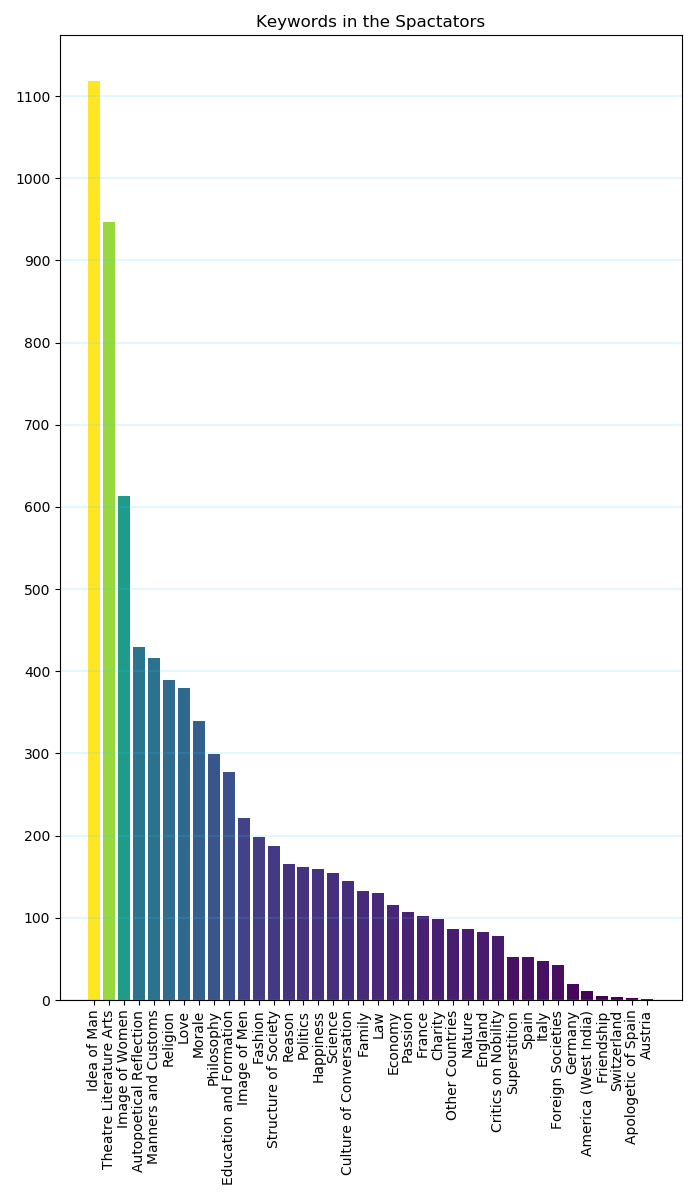

In [21]:
# bar chart of all keywords in the corpus
%matplotlib notebook

cmap = mpl.cm.get_cmap("viridis")
norm = mpl.colors.Normalize(vmin=min(d_all_keywords.items(), key=lambda k: k[1])[1], vmax=max(d_all_keywords.items(), key=lambda k: k[1])[1])
color = [cmap(norm(x)) for x in list(d_all_keywords.values())]

plt.bar(range(len(d_all_keywords)), list(d_all_keywords.values()), align='center', color=color)
title = 'Keywords in the Spactators'
plt.title(title)
plt.xticks(range(len(d_all_keywords)), list(d_all_keywords.keys()))
plt.xticks(rotation=90)
plt.locator_params(axis='y', nbins=20)
plt.grid(axis='y', linewidth=0.2, color='#33ccff')
fig = plt.gcf()
fig.set_size_inches(7, 12, forward=True)
fig.tight_layout()
fig.savefig(output+'barcharts/keywords_total.png', dpi=500) #, bbox_inches='tight'

<IPython.core.display.Javascript object>


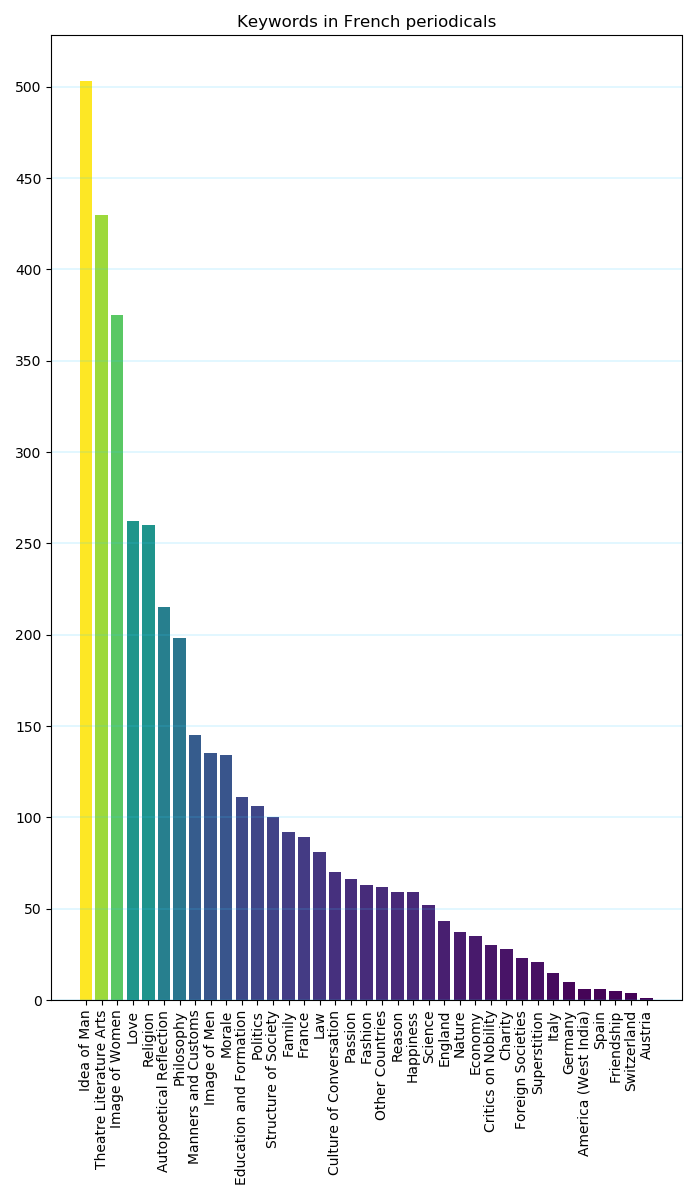

In [26]:
# bar chart of all keywords of a language
%matplotlib notebook

cmap = mpl.cm.get_cmap("viridis")
norm = mpl.colors.Normalize(vmin=min(d_lang_keywords.items(), key=lambda k: k[1])[1], vmax=max(d_lang_keywords.items(), key=lambda k: k[1])[1])
color = [cmap(norm(x)) for x in list(d_lang_keywords.values())]

plt.bar(range(len(d_lang_keywords)), list(d_lang_keywords.values()), align='center', color=color)
title = 'Keywords in '+language+' periodicals'
plt.title(title)
plt.xticks(range(len(d_lang_keywords)), list(d_lang_keywords.keys()))
plt.xticks(rotation=90)
plt.locator_params(axis='y', nbins=20)
plt.grid(axis='y', linewidth=0.2, color='#33ccff')
fig = plt.gcf()
fig.set_size_inches(7, 12, forward=True)
fig.tight_layout()
fig.savefig(output+'barcharts/keywords_'+language+'.png', dpi=500) #, bbox_inches='tight'

<IPython.core.display.Javascript object>


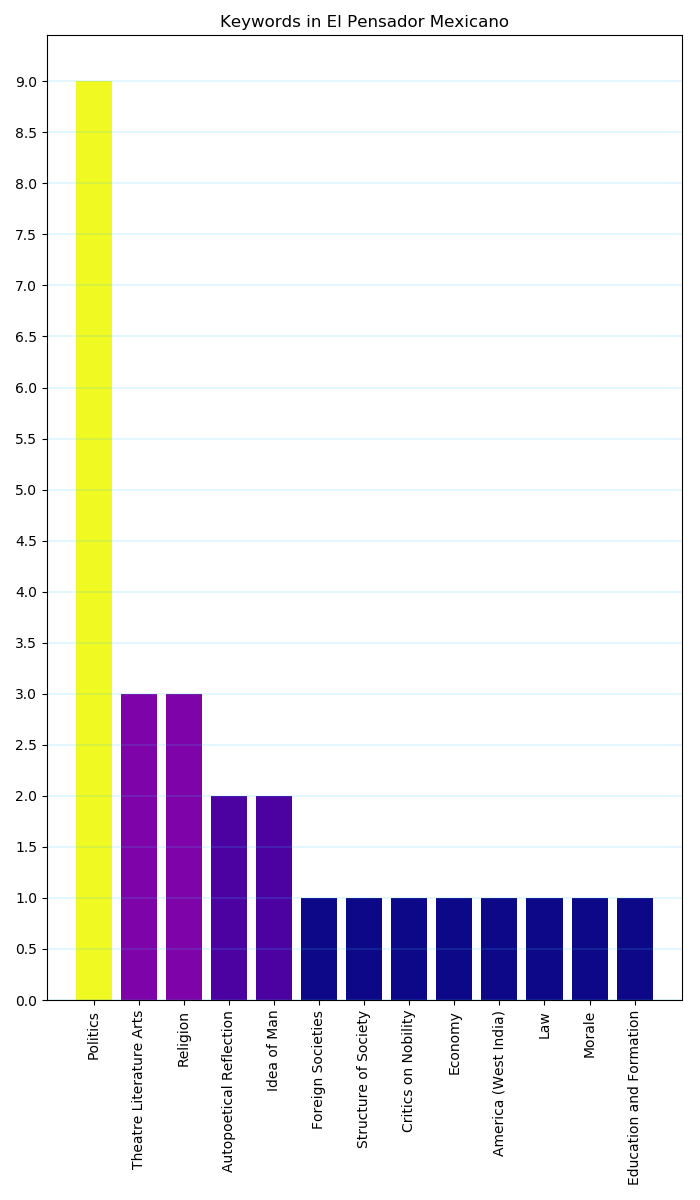

In [27]:
%matplotlib notebook
   
cmap = mpl.cm.get_cmap("plasma")
norm = mpl.colors.Normalize(vmin=min(d_periodical.items(), key=lambda k: k[1])[1], vmax=max(d_periodical.items(), key=lambda k: k[1])[1])
color = [cmap(norm(x)) for x in list(d_periodical.values())]
    
plt.clf() # This method clears the buffer, so images saved with savefig() don't overlap
plt.bar(range(len(d_periodical)), list(d_periodical.values()), align='center', color=color)
title = 'Keywords in ' + periodical_name # set a title for your graphic
plt.title(title)
plt.xticks(range(len(d_periodical)), list(d_periodical.keys()))
plt.xticks(rotation=90)
plt.locator_params(axis='y', nbins=20)
plt.grid(axis='y', linewidth=0.2, color='#33ccff')
fig = plt.gcf()
fig.set_size_inches(7, 12, forward=True)
fig.tight_layout()
fig.savefig(output+'barcharts/keywords_'+periodical_name+'.png', dpi=500) #, bbox_inches='tight'

<IPython.core.display.Javascript object>


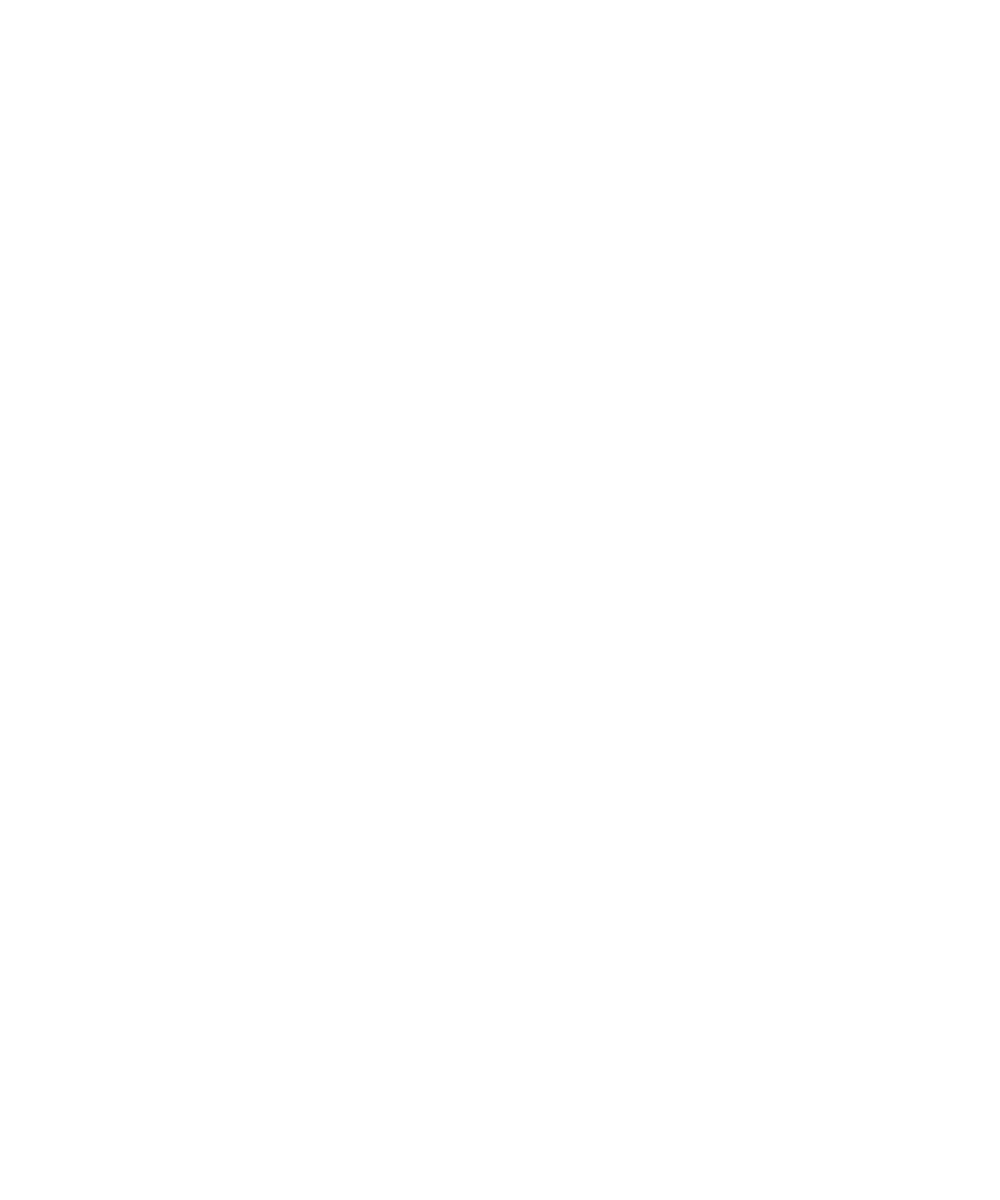

In [70]:
%matplotlib notebook
    
cmap = mpl.cm.get_cmap("summer")
norm = mpl.colors.Normalize(vmin=min(d_keyword.items(), key=lambda k: k[1])[1], vmax=max(d_keyword.items(), key=lambda k: k[1])[1])
color = [cmap(norm(x)) for x in list(d_keyword.values())]
    
plt.clf() # This method clears the buffer, so images saved with savefig() don't overlap
plt.bar(range(len(d_keyword)), list(d_keyword.values()), align='center', color=color)
title = 'Periodicals with keyword '+term # set a title for your graphic
plt.title(title)
plt.xticks(range(len(d_keyword)), list(d_keyword.keys()))
plt.xticks(rotation=90)
plt.locator_params(axis='y', nbins=20)
plt.grid(axis='y', linewidth=0.2, color='#33ccff')
fig = plt.gcf()
fig.set_size_inches(10, 12, forward=True)
fig.tight_layout()
fig.savefig(output+'barcharts/keyword_'+term+'.png', dpi=500) #, bbox_inches='tight'

## Pie charts

We will only use the top 22 keywords from the corpus for the pie charts to visualize with 22 colors of maximum contrast, according to Kenneth L. Kelly (1965): http://www.iscc-archive.org/pdf/PC54_1724_001.pdf.

In [71]:
d_all_keywords.items()

odict_items([('Idea of Man', 1118), ('Theatre Literature Arts', 947), ('Image of Women', 613), ('Autopoetical Reflection', 430), ('Manners and Customs', 416), ('Religion', 390), ('Love', 380), ('Morale', 339), ('Philosophy', 299), ('Education and Formation', 278), ('Image of Men', 221), ('Fashion', 198), ('Structure of Society', 188), ('Reason', 165), ('Politics', 162), ('Happiness', 159), ('Science', 154), ('Culture of Conversation', 145), ('Family', 133), ('Law', 130), ('Economy', 116), ('Passion', 107), ('France', 102), ('Charity', 99), ('Other Countries', 87), ('Nature', 87), ('England', 83), ('Critics on Nobility', 78), ('Superstition', 52), ('Spain', 52), ('Italy', 48), ('Foreign Societies', 43), ('Germany', 19), ('America (West India)', 11), ('Friendship', 5), ('Switzerland', 4), ('Apologetic of Spain', 2), ('Austria', 1)])

In [72]:
reduced_keywords = dict(sorted(d_all_keywords.items(), key=operator.itemgetter(1), reverse=True)[:22])
reduced_keywords

{'Idea of Man': 1118,
 'Theatre Literature Arts': 947,
 'Image of Women': 613,
 'Autopoetical Reflection': 430,
 'Manners and Customs': 416,
 'Religion': 390,
 'Love': 380,
 'Morale': 339,
 'Philosophy': 299,
 'Education and Formation': 278,
 'Image of Men': 221,
 'Fashion': 198,
 'Structure of Society': 188,
 'Reason': 165,
 'Politics': 162,
 'Happiness': 159,
 'Science': 154,
 'Culture of Conversation': 145,
 'Family': 133,
 'Law': 130,
 'Economy': 116,
 'Passion': 107}

In [73]:
# pie chart colors

# colors acording to Kenneth L. Kelly (): http://www.iscc-archive.org/pdf/PC54_1724_001.pdf, 
# see also: https://eleanormaclure.files.wordpress.com/2011/03/colour-coding.pdf Page 5
# and https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
# kelly_colors = ['#F2F3F4', '#222222', '#F3C300', '#875692', '#F38400', '#A1CAF1', '#BE0032', 
#'#C2B280', '#848482', '#008856', '#E68FAC', '#0067A5', '#F99379', '#604E97', '#F6A600', '#B3446C', 
#'#DCD300', '#882D17', '#8DB600', '#654522', '#E25822', '#2B3D26']
all_colors={
    "Idea of Man":"#F3C300",
    "Theatre Literature Arts" :"#875692",
    "Image of Women" :"#F38400",
    "Autopoetical Reflection":"#A1CAF1",
    "Manners and Customs" :"#BE0032",
    "Religion":"#848482",
    "Love" :"#C2B280",
    "Morale":"#008856",
    "Philosophy":"#E68FAC",
    "Education and Formation":"#0067A5",
    "Image of Men" :"#F99379",
    "Fashion" :"#604E97",
    "Structure of Society" :"#B3446C",
    "Reason" :"#F6A600",
    "Politics":"#882D17", 
    "Happiness" :"#DCD300",
    "Science" :"#654522",
    "Culture of Conversation":"#8DB600",
    "Family":"#E25822",
    "Law" :"#2B3D26",
    "Economy":"#222222",
    "Passion":"#F2F3F4"
      
}

In [74]:
for key,value in all_colors.items():
    print(colored.bg(value) + key)

Idea of Man
Theatre Literature Arts
Image of Women
Autopoetical Reflection
Manners and Customs
Religion
Love
Morale
Philosophy
Education and Formation
Image of Men
Fashion
Structure of Society
Reason
Politics
Happiness
Science
Culture of Conversation
Family
Law
Economy
Passion


In [75]:
# Legend - all labels only
# used in DiSpecs to integrate into the Gephi network visualization

handles=[]
for key, value in all_colors.items():
    handle = value.split('#')
    handle = mpatches.Patch(color=value, label=key, linewidth=5)
    handles.append(handle)
legend = plt.legend(loc=2, prop={'size': 15}, handles=handles, facecolor='#000000', framealpha=1, shadow=False)
plt.setp(legend.get_texts(), color='w')
plt.axis('off')

def export_legend(legend, filename=output+"piecharts/legend_black.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", pad_inches=0,
    bbox_inches=bbox) 

export_legend(legend)

In [76]:
# Legend - all labels only -> same as before, but white and titled
# used in DiSpecs for the website

handles=[]
for key, value in all_colors.items():
    handle = value.split('#')
    handle = mpatches.Patch(color=value, label=key, linewidth=5)
    handles.append(handle)
legend = plt.legend(loc=2,prop={'size': 15}, handles=handles, facecolor='#ffffff', 
                    framealpha=1, shadow=False, title='Manually assigned keywords \n', title_fontsize=17)
plt.setp(legend.get_texts(), color='black')
plt.axis('off')

def export_legend(legend, 
                  filename=output+"/piecharts/legend_white.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, pad_inches=0.5,
    bbox_inches=bbox) 

export_legend(legend)

In [98]:
print(language, d_lang.keys())

French odict_keys(['Le Spectateur ou le Socrate moderne', 'La Bigarure', 'Le Mentor moderne', 'Le Nouveau Spectateur', 'La Bagatelle', 'Le Misantrope', "La Spectatrice danoise, ou l'Aspasie moderne", 'Le Philosophe Nouvelliste', 'Le Spectateur français avant la Révolution', 'Le Monde comme il est', 'Le Nouveau Spectateur français', 'Le Censeur ou Caractères des Mœurs de la Haye', 'Le Spectateur françois pendant le gouvernement révolutionnaire', 'Le Monde', 'Le Spectateur françois', "La Spectatrice. Ouvrage traduit de l'anglois", 'Le Spectateur françois ou le nouveau Socrate moderne', 'La Spectatrice', 'Le Spectateur françois, ou Journal des Mœurs', 'Le Cabinet du Philosophe', 'Le Spectateur inconnu', "L'Indigent philosophe ou l'homme sans souci", 'Le Spectateur suisse', 'Les Chiffons', 'Le Spectateur moderne'])


OrderedDict([('Idea of Man', 110), ('Religion', 89), ('Philosophy', 77), ('Image of Women', 69), ('Theatre Literature Arts', 65), ('Love', 35), ('Culture of Conversation', 33), ('Manners and Customs', 30), ('Morale', 29), ('Autopoetical Reflection', 28), ('Education and Formation', 26), ('Image of Men', 23), ('Politics', 21), ('Other Countries', 20), ('Structure of Society', 19), ('Family', 15), ('Fashion', 14), ('Happiness', 14), ('Nature', 13), ('Science', 12), ('Passion', 12), ('Superstition', 9), ('Charity', 9), ('England', 7), ('Foreign Societies', 7), ('France', 6), ('America (West India)', 6), ('Economy', 6), ('Critics on Nobility', 5), ('Reason', 4), ('Law', 4), ('Germany', 2), ('Austria', 1), ('Italy', 1)])
{'Idea of Man': 110, 'Religion': 89, 'Philosophy': 77, 'Image of Women': 69, 'Theatre Literature Arts': 65, 'Love': 35, 'Culture of Conversation': 33, 'Manners and Customs': 30, 'Morale': 29, 'Autopoetical Reflection': 28, 'Education and Formation': 26, 'Image of Men': 23, 

<IPython.core.display.Javascript object>


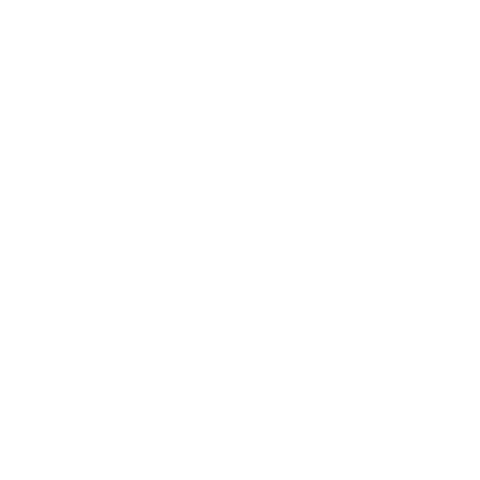

OrderedDict([('Theatre Literature Arts', 84), ('Image of Women', 37), ('Love', 35), ('Religion', 34), ('Morale', 26), ('Law', 22), ('Structure of Society', 21), ('Image of Men', 18), ('Politics', 15), ('Idea of Man', 14), ('Manners and Customs', 14), ('France', 10), ('Science', 9), ('Passion', 9), ('Italy', 7), ('Family', 6), ('Autopoetical Reflection', 6), ('Other Countries', 6), ('England', 6), ('Philosophy', 5), ('Education and Formation', 5), ('Economy', 4), ('Foreign Societies', 3), ('Nature', 3), ('Critics on Nobility', 3), ('Culture of Conversation', 2), ('Friendship', 1), ('Germany', 1), ('Reason', 1), ('Charity', 1), ('Superstition', 1), ('Switzerland', 1)])
{'Theatre Literature Arts': 84, 'Image of Women': 37, 'Love': 35, 'Religion': 34, 'Morale': 26, 'Law': 22, 'Structure of Society': 21, 'Image of Men': 18, 'Politics': 15, 'Idea of Man': 14, 'Manners and Customs': 14, 'Science': 9, 'Passion': 9, 'Family': 6, 'Autopoetical Reflection': 6, 'Philosophy': 5, 'Education and Form

<IPython.core.display.Javascript object>


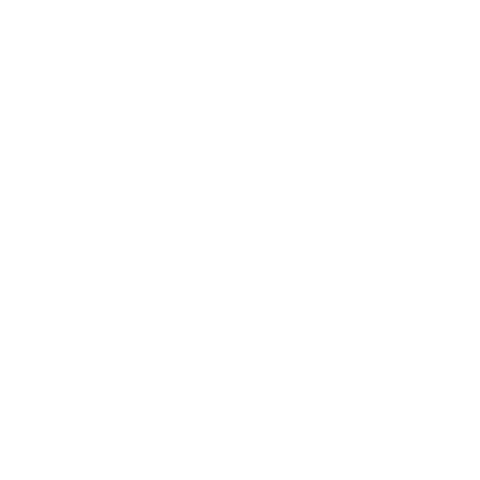

OrderedDict([('Idea of Man', 31), ('Theatre Literature Arts', 25), ('Religion', 24), ('Image of Women', 22), ('Manners and Customs', 21), ('Morale', 18), ('Education and Formation', 15), ('Philosophy', 14), ('Image of Men', 13), ('Love', 13), ('Fashion', 11), ('Autopoetical Reflection', 9), ('Culture of Conversation', 9), ('Structure of Society', 7), ('Nature', 7), ('Happiness', 7), ('Family', 6), ('Reason', 5), ('Passion', 5), ('Charity', 5), ('England', 3), ('Foreign Societies', 3), ('Law', 3), ('Economy', 2), ('Politics', 2), ('Other Countries', 2), ('France', 2), ('Science', 1), ('Critics on Nobility', 1)])
{'Idea of Man': 31, 'Theatre Literature Arts': 25, 'Religion': 24, 'Image of Women': 22, 'Manners and Customs': 21, 'Morale': 18, 'Education and Formation': 15, 'Philosophy': 14, 'Image of Men': 13, 'Love': 13, 'Fashion': 11, 'Autopoetical Reflection': 9, 'Culture of Conversation': 9, 'Structure of Society': 7, 'Happiness': 7, 'Family': 6, 'Reason': 5, 'Passion': 5, 'Law': 3, 'E

<IPython.core.display.Javascript object>


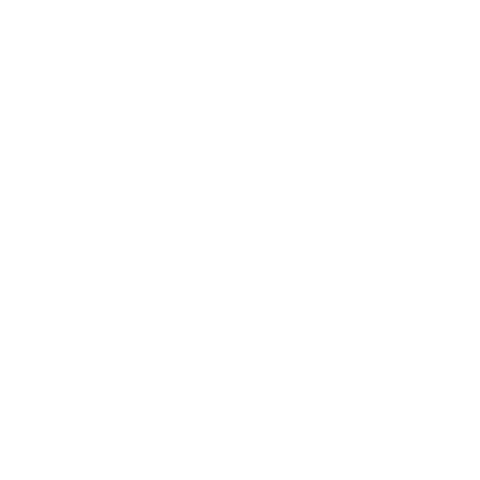

OrderedDict([('Idea of Man', 66), ('Image of Women', 48), ('Love', 45), ('Theatre Literature Arts', 31), ('Autopoetical Reflection', 24), ('Image of Men', 16), ('Family', 16), ('Philosophy', 15), ('Religion', 11), ('Law', 9), ('Morale', 8), ('Structure of Society', 7), ('Culture of Conversation', 7), ('Happiness', 6), ('Economy', 5), ('Fashion', 5), ('Charity', 4), ('Science', 4), ('Education and Formation', 3), ('Nature', 3), ('Critics on Nobility', 3), ('France', 2), ('Manners and Customs', 2), ('Other Countries', 2), ('Friendship', 1), ('Superstition', 1), ('Politics', 1), ('England', 1)])
{'Idea of Man': 66, 'Image of Women': 48, 'Love': 45, 'Theatre Literature Arts': 31, 'Autopoetical Reflection': 24, 'Image of Men': 16, 'Family': 16, 'Philosophy': 15, 'Religion': 11, 'Law': 9, 'Morale': 8, 'Structure of Society': 7, 'Culture of Conversation': 7, 'Happiness': 6, 'Economy': 5, 'Fashion': 5, 'Science': 4, 'Education and Formation': 3, 'Manners and Customs': 2, 'Politics': 1}
['Idea 

<IPython.core.display.Javascript object>


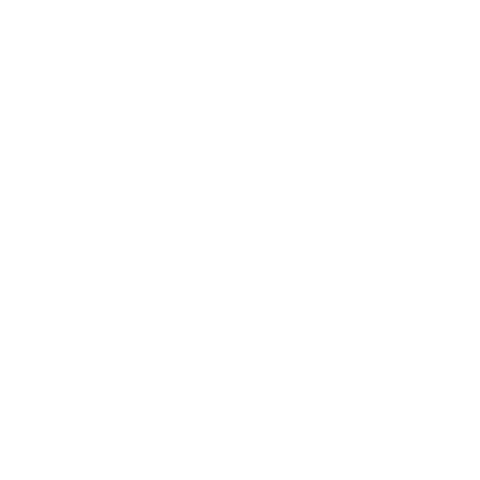

OrderedDict([('Theatre Literature Arts', 38), ('Idea of Man', 37), ('Autopoetical Reflection', 34), ('Philosophy', 20), ('Image of Women', 17), ('Morale', 13), ('France', 13), ('Religion', 12), ('Reason', 12), ('Education and Formation', 9), ('England', 8), ('Love', 8), ('Other Countries', 8), ('Law', 7), ('Culture of Conversation', 7), ('Image of Men', 6), ('Structure of Society', 6), ('Science', 5), ('Germany', 5), ('Happiness', 5), ('Italy', 4), ('Manners and Customs', 3), ('Fashion', 3), ('Economy', 3), ('Family', 3), ('Spain', 3), ('Nature', 2), ('Politics', 2), ('Critics on Nobility', 1), ('Charity', 1), ('Superstition', 1)])
{'Theatre Literature Arts': 38, 'Idea of Man': 37, 'Autopoetical Reflection': 34, 'Philosophy': 20, 'Image of Women': 17, 'Morale': 13, 'Religion': 12, 'Reason': 12, 'Education and Formation': 9, 'Love': 8, 'Law': 7, 'Culture of Conversation': 7, 'Image of Men': 6, 'Structure of Society': 6, 'Science': 5, 'Happiness': 5, 'Manners and Customs': 3, 'Fashion': 

<IPython.core.display.Javascript object>


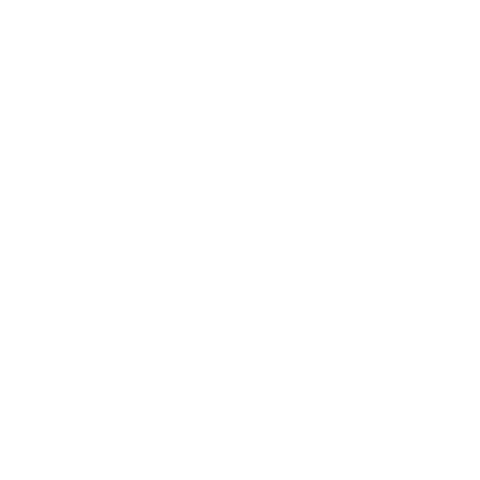

OrderedDict([('Idea of Man', 45), ('Theatre Literature Arts', 39), ('Religion', 28), ('Autopoetical Reflection', 24), ('Philosophy', 20), ('Image of Women', 14), ('Love', 11), ('France', 11), ('Other Countries', 10), ('Image of Men', 8), ('Fashion', 6), ('Reason', 5), ('Family', 4), ('Economy', 3), ('Law', 3), ('Politics', 3), ('Education and Formation', 3), ('Structure of Society', 2), ('Italy', 2), ('England', 2), ('Nature', 1), ('Foreign Societies', 1), ('Manners and Customs', 1), ('Happiness', 1), ('Morale', 1), ('Spain', 1), ('Germany', 1)])
{'Idea of Man': 45, 'Theatre Literature Arts': 39, 'Religion': 28, 'Autopoetical Reflection': 24, 'Philosophy': 20, 'Image of Women': 14, 'Love': 11, 'Image of Men': 8, 'Fashion': 6, 'Reason': 5, 'Family': 4, 'Economy': 3, 'Law': 3, 'Politics': 3, 'Education and Formation': 3, 'Structure of Society': 2, 'Manners and Customs': 1, 'Happiness': 1, 'Morale': 1}
['Idea of Man', 'Theatre Literature Arts', 'Religion', 'Autopoetical Reflection', 'Phil

<IPython.core.display.Javascript object>


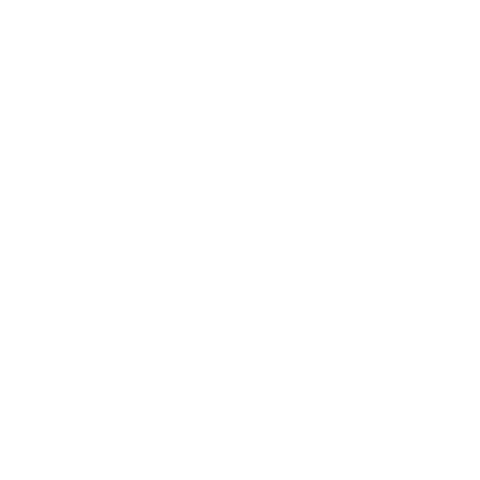

OrderedDict([('Manners and Customs', 24), ('Theatre Literature Arts', 22), ('Idea of Man', 18), ('Image of Women', 14), ('Love', 11), ('Philosophy', 11), ('Religion', 10), ('Politics', 9), ('Autopoetical Reflection', 5), ('Structure of Society', 5), ('Reason', 4), ('Image of Men', 3), ('Family', 2), ('Science', 2), ('Fashion', 2), ('Critics on Nobility', 2), ('Happiness', 1), ('Friendship', 1), ('Passion', 1), ('Nature', 1), ('Other Countries', 1), ('France', 1), ('Charity', 1), ('Law', 1)])
{'Manners and Customs': 24, 'Theatre Literature Arts': 22, 'Idea of Man': 18, 'Image of Women': 14, 'Love': 11, 'Philosophy': 11, 'Religion': 10, 'Politics': 9, 'Autopoetical Reflection': 5, 'Structure of Society': 5, 'Reason': 4, 'Image of Men': 3, 'Family': 2, 'Science': 2, 'Fashion': 2, 'Happiness': 1, 'Passion': 1, 'Law': 1}
['Manners and Customs', 'Theatre Literature Arts', 'Idea of Man', 'Image of Women', 'Love', 'Philosophy', 'Religion', 'Politics', 'Autopoetical Reflection', 'Structure of S

<IPython.core.display.Javascript object>


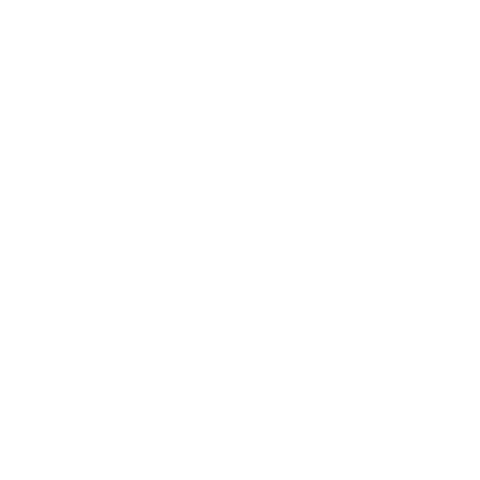

OrderedDict([('Idea of Man', 29), ('Theatre Literature Arts', 20), ('Image of Women', 19), ('Autopoetical Reflection', 16), ('Love', 15), ('Politics', 12), ('Image of Men', 12), ('Culture of Conversation', 11), ('Superstition', 9), ('Manners and Customs', 9), ('Science', 8), ('Law', 6), ('Passion', 5), ('Education and Formation', 4), ('Structure of Society', 4), ('Critics on Nobility', 4), ('Philosophy', 3), ('Morale', 3), ('France', 2), ('Family', 2), ('Religion', 1), ('Fashion', 1), ('Italy', 1), ('Other Countries', 1), ('England', 1), ('Economy', 1), ('Foreign Societies', 1)])
{'Idea of Man': 29, 'Theatre Literature Arts': 20, 'Image of Women': 19, 'Autopoetical Reflection': 16, 'Love': 15, 'Politics': 12, 'Image of Men': 12, 'Culture of Conversation': 11, 'Manners and Customs': 9, 'Science': 8, 'Law': 6, 'Passion': 5, 'Education and Formation': 4, 'Structure of Society': 4, 'Philosophy': 3, 'Morale': 3, 'Family': 2, 'Religion': 1, 'Fashion': 1, 'Economy': 1}
['Idea of Man', 'Theatr

<IPython.core.display.Javascript object>


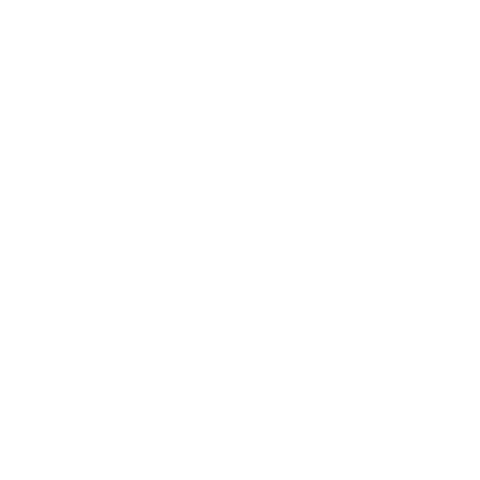

OrderedDict([('Idea of Man', 16), ('Image of Women', 14), ('Structure of Society', 12), ('Autopoetical Reflection', 11), ('Love', 10), ('Theatre Literature Arts', 10), ('Philosophy', 7), ('Passion', 6), ('Morale', 6), ('France', 6), ('Family', 5), ('Manners and Customs', 5), ('Politics', 5), ('Image of Men', 5), ('Nature', 4), ('Law', 4), ('Religion', 3), ('Happiness', 3), ('Science', 3), ('Other Countries', 3), ('Charity', 2), ('Education and Formation', 2), ('Foreign Societies', 1), ('Reason', 1)])
{'Idea of Man': 16, 'Image of Women': 14, 'Structure of Society': 12, 'Autopoetical Reflection': 11, 'Love': 10, 'Theatre Literature Arts': 10, 'Philosophy': 7, 'Passion': 6, 'Morale': 6, 'Family': 5, 'Manners and Customs': 5, 'Politics': 5, 'Image of Men': 5, 'Law': 4, 'Religion': 3, 'Happiness': 3, 'Science': 3, 'Education and Formation': 2, 'Reason': 1}
['Idea of Man', 'Image of Women', 'Structure of Society', 'Autopoetical Reflection', 'Love', 'Theatre Literature Arts', 'Philosophy', '

<IPython.core.display.Javascript object>


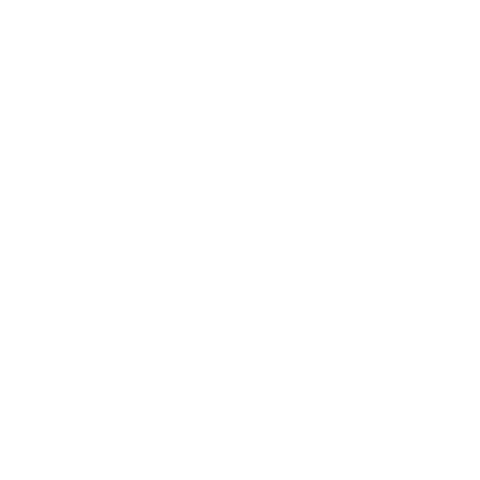

OrderedDict([('Idea of Man', 47), ('Image of Women', 38), ('Love', 29), ('Theatre Literature Arts', 21), ('Education and Formation', 19), ('Reason', 16), ('Autopoetical Reflection', 14), ('Happiness', 13), ('Passion', 12), ('Image of Men', 9), ('Law', 9), ('Philosophy', 6), ('Religion', 5), ('Family', 5), ('England', 5), ('Morale', 4), ('Science', 4), ('Other Countries', 4), ('Economy', 3), ('Switzerland', 2), ('Politics', 1), ('Structure of Society', 1), ('Spain', 1), ('France', 1)])
{'Idea of Man': 47, 'Image of Women': 38, 'Love': 29, 'Theatre Literature Arts': 21, 'Education and Formation': 19, 'Reason': 16, 'Autopoetical Reflection': 14, 'Happiness': 13, 'Passion': 12, 'Image of Men': 9, 'Law': 9, 'Philosophy': 6, 'Religion': 5, 'Family': 5, 'Morale': 4, 'Science': 4, 'Economy': 3, 'Politics': 1, 'Structure of Society': 1}
['Idea of Man', 'Image of Women', 'Love', 'Theatre Literature Arts', 'Education and Formation', 'Reason', 'Autopoetical Reflection', 'Happiness', 'Passion', 'Im

<IPython.core.display.Javascript object>


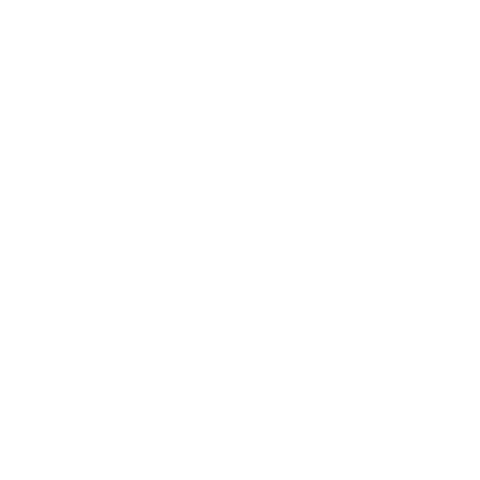

OrderedDict([('Idea of Man', 18), ('Theatre Literature Arts', 17), ('Religion', 16), ('Image of Women', 13), ('Philosophy', 10), ('Autopoetical Reflection', 7), ('Love', 7), ('Family', 7), ('Critics on Nobility', 5), ('Image of Men', 4), ('Education and Formation', 4), ('Morale', 2), ('Fashion', 2), ('France', 1), ('England', 1), ('Friendship', 1), ('Economy', 1), ('Science', 1)])
{'Idea of Man': 18, 'Theatre Literature Arts': 17, 'Religion': 16, 'Image of Women': 13, 'Philosophy': 10, 'Autopoetical Reflection': 7, 'Love': 7, 'Family': 7, 'Image of Men': 4, 'Education and Formation': 4, 'Morale': 2, 'Fashion': 2, 'Economy': 1, 'Science': 1}
['Idea of Man', 'Theatre Literature Arts', 'Religion', 'Image of Women', 'Philosophy', 'Autopoetical Reflection', 'Love', 'Family', 'Image of Men', 'Education and Formation', 'Morale', 'Fashion', 'Economy', 'Science']
[18, 17, 16, 13, 10, 7, 7, 7, 4, 4, 2, 2, 1, 1]
['#F3C300', '#875692', '#848482', '#F38400', '#E68FAC', '#A1CAF1', '#C2B280', '#E2582

<IPython.core.display.Javascript object>


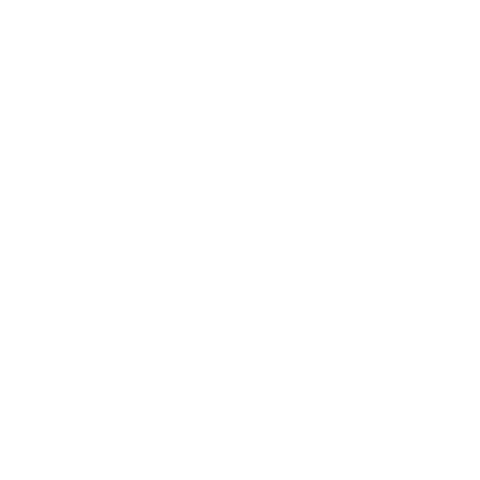

OrderedDict([('Idea of Man', 16), ('Manners and Customs', 15), ('Image of Women', 8), ('Religion', 6), ('Theatre Literature Arts', 5), ('Family', 5), ('Image of Men', 5), ('Autopoetical Reflection', 4), ('Love', 3), ('Education and Formation', 2), ('Science', 1), ('Happiness', 1), ('Charity', 1)])
{'Idea of Man': 16, 'Manners and Customs': 15, 'Image of Women': 8, 'Religion': 6, 'Theatre Literature Arts': 5, 'Family': 5, 'Image of Men': 5, 'Autopoetical Reflection': 4, 'Love': 3, 'Education and Formation': 2, 'Science': 1, 'Happiness': 1}
['Idea of Man', 'Manners and Customs', 'Image of Women', 'Religion', 'Theatre Literature Arts', 'Family', 'Image of Men', 'Autopoetical Reflection', 'Love', 'Education and Formation', 'Science', 'Happiness']
[16, 15, 8, 6, 5, 5, 5, 4, 3, 2, 1, 1]
['#F3C300', '#BE0032', '#F38400', '#848482', '#875692', '#E25822', '#F99379', '#A1CAF1', '#C2B280', '#0067A5', '#654522', '#DCD300']


<IPython.core.display.Javascript object>


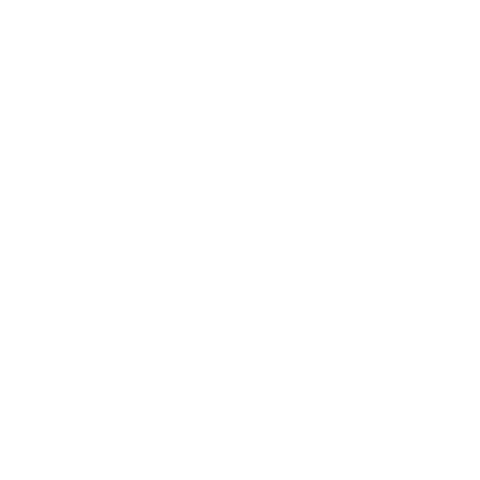

OrderedDict([('France', 12), ('Politics', 11), ('Law', 9), ('Structure of Society', 6), ('Idea of Man', 6), ('Image of Women', 5), ('Religion', 4), ('Morale', 3), ('Education and Formation', 3), ('Theatre Literature Arts', 3), ('Economy', 3), ('Autopoetical Reflection', 2), ('Critics on Nobility', 2), ('Happiness', 2), ('Family', 2), ('Manners and Customs', 2), ('Other Countries', 2), ('Philosophy', 1), ('Friendship', 1), ('Love', 1), ('Foreign Societies', 1)])
{'Politics': 11, 'Law': 9, 'Structure of Society': 6, 'Idea of Man': 6, 'Image of Women': 5, 'Religion': 4, 'Morale': 3, 'Education and Formation': 3, 'Theatre Literature Arts': 3, 'Economy': 3, 'Autopoetical Reflection': 2, 'Happiness': 2, 'Family': 2, 'Manners and Customs': 2, 'Philosophy': 1, 'Love': 1}
['Politics', 'Law', 'Structure of Society', 'Idea of Man', 'Image of Women', 'Religion', 'Morale', 'Education and Formation', 'Theatre Literature Arts', 'Economy', 'Autopoetical Reflection', 'Happiness', 'Family', 'Manners and

<IPython.core.display.Javascript object>


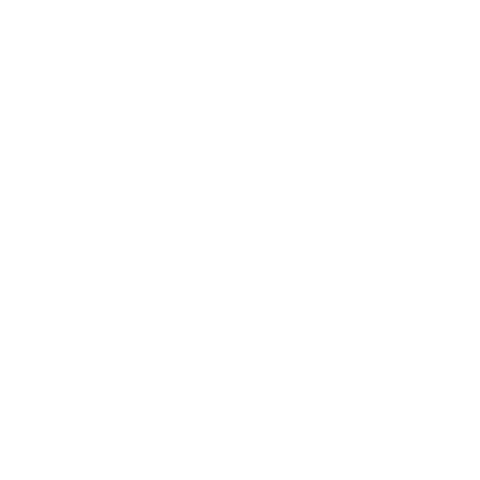

OrderedDict([('Love', 14), ('Image of Women', 11), ('Autopoetical Reflection', 8), ('Theatre Literature Arts', 8), ('Idea of Man', 6), ('Morale', 6), ('Passion', 6), ('Structure of Society', 4), ('Family', 3), ('Happiness', 3), ('Politics', 3), ('Religion', 2), ('Manners and Customs', 2), ('France', 2), ('Image of Men', 2), ('Foreign Societies', 2), ('Charity', 2), ('Philosophy', 1), ('Reason', 1)])
{'Love': 14, 'Image of Women': 11, 'Autopoetical Reflection': 8, 'Theatre Literature Arts': 8, 'Idea of Man': 6, 'Morale': 6, 'Passion': 6, 'Structure of Society': 4, 'Family': 3, 'Happiness': 3, 'Politics': 3, 'Religion': 2, 'Manners and Customs': 2, 'Image of Men': 2, 'Philosophy': 1, 'Reason': 1}
['Love', 'Image of Women', 'Autopoetical Reflection', 'Theatre Literature Arts', 'Idea of Man', 'Morale', 'Passion', 'Structure of Society', 'Family', 'Happiness', 'Politics', 'Religion', 'Manners and Customs', 'Image of Men', 'Philosophy', 'Reason']
[14, 11, 8, 8, 6, 6, 6, 4, 3, 3, 3, 2, 2, 2, 

<IPython.core.display.Javascript object>


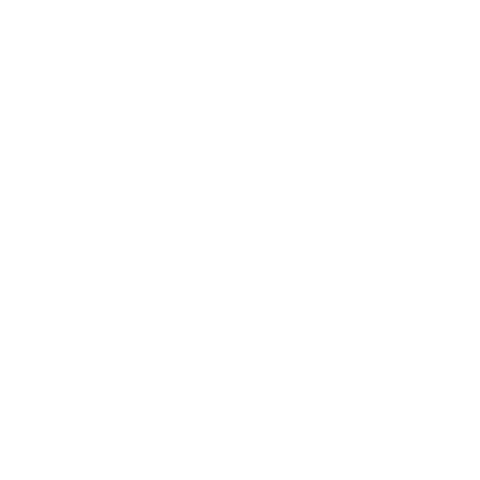

OrderedDict([('Image of Women', 9), ('Love', 6), ('Religion', 6), ('Idea of Man', 5), ('Education and Formation', 4), ('Autopoetical Reflection', 3), ('France', 2), ('Charity', 2), ('Theatre Literature Arts', 1), ('Image of Men', 1), ('Critics on Nobility', 1), ('Reason', 1)])
{'Image of Women': 9, 'Love': 6, 'Religion': 6, 'Idea of Man': 5, 'Education and Formation': 4, 'Autopoetical Reflection': 3, 'Theatre Literature Arts': 1, 'Image of Men': 1, 'Reason': 1}
['Image of Women', 'Love', 'Religion', 'Idea of Man', 'Education and Formation', 'Autopoetical Reflection', 'Theatre Literature Arts', 'Image of Men', 'Reason']
[9, 6, 6, 5, 4, 3, 1, 1, 1]
['#F38400', '#C2B280', '#848482', '#F3C300', '#0067A5', '#A1CAF1', '#875692', '#F99379', '#F6A600']


<IPython.core.display.Javascript object>


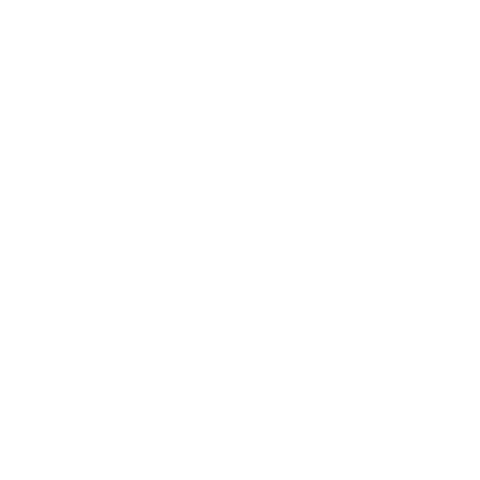

OrderedDict([('Image of Women', 15), ('Love', 12), ('Education and Formation', 9), ('Idea of Man', 9), ('Morale', 9), ('Autopoetical Reflection', 8), ('England', 8), ('Family', 8), ('Manners and Customs', 7), ('Passion', 6), ('Fashion', 6), ('Reason', 6), ('Image of Men', 3), ('Theatre Literature Arts', 3), ('Religion', 3), ('Philosophy', 3), ('France', 2), ('Nature', 2), ('Foreign Societies', 2), ('Germany', 1), ('Critics on Nobility', 1), ('Science', 1), ('Politics', 1), ('Happiness', 1)])
{'Image of Women': 15, 'Love': 12, 'Education and Formation': 9, 'Idea of Man': 9, 'Morale': 9, 'Autopoetical Reflection': 8, 'Family': 8, 'Manners and Customs': 7, 'Passion': 6, 'Fashion': 6, 'Reason': 6, 'Image of Men': 3, 'Theatre Literature Arts': 3, 'Religion': 3, 'Philosophy': 3, 'Science': 1, 'Politics': 1, 'Happiness': 1}
['Image of Women', 'Love', 'Education and Formation', 'Idea of Man', 'Morale', 'Autopoetical Reflection', 'Family', 'Manners and Customs', 'Passion', 'Fashion', 'Reason', 

<IPython.core.display.Javascript object>


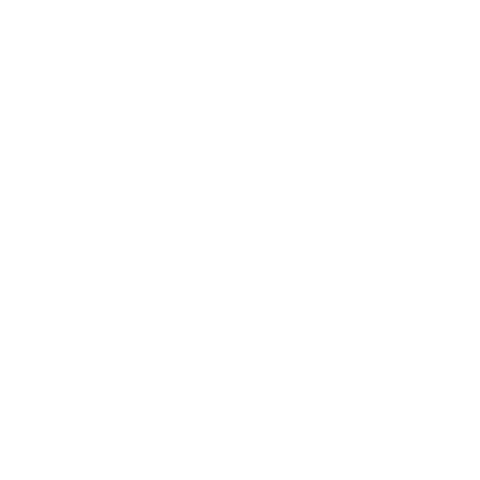

OrderedDict([('Politics', 16), ('France', 12), ('Theatre Literature Arts', 4), ('Autopoetical Reflection', 3), ('Economy', 3), ('Idea of Man', 2), ('Other Countries', 2), ('Image of Women', 2), ('Image of Men', 1), ('Education and Formation', 1), ('Manners and Customs', 1)])
{'Politics': 16, 'Theatre Literature Arts': 4, 'Autopoetical Reflection': 3, 'Economy': 3, 'Idea of Man': 2, 'Image of Women': 2, 'Image of Men': 1, 'Education and Formation': 1, 'Manners and Customs': 1}
['Politics', 'Theatre Literature Arts', 'Autopoetical Reflection', 'Economy', 'Idea of Man', 'Image of Women', 'Image of Men', 'Education and Formation', 'Manners and Customs']
[16, 4, 3, 3, 2, 2, 1, 1, 1]
['#882D17', '#875692', '#A1CAF1', '#222222', '#F3C300', '#F38400', '#F99379', '#0067A5', '#BE0032']


<IPython.core.display.Javascript object>


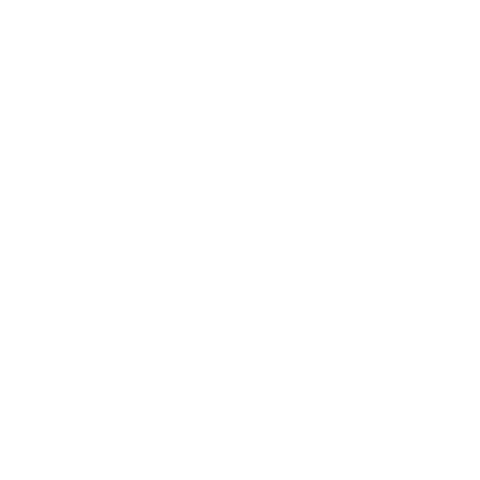

OrderedDict([('Image of Women', 8), ('Idea of Man', 6), ('Theatre Literature Arts', 4), ('Autopoetical Reflection', 4), ('Fashion', 4), ('Morale', 3), ('Image of Men', 3), ('Philosophy', 3), ('Love', 2), ('Religion', 2), ('Structure of Society', 1), ('Other Countries', 1), ('Foreign Societies', 1), ('Happiness', 1), ('Law', 1), ('Politics', 1), ('Culture of Conversation', 1), ('Family', 1), ('Education and Formation', 1), ('Reason', 1)])
{'Image of Women': 8, 'Idea of Man': 6, 'Theatre Literature Arts': 4, 'Autopoetical Reflection': 4, 'Fashion': 4, 'Morale': 3, 'Image of Men': 3, 'Philosophy': 3, 'Love': 2, 'Religion': 2, 'Structure of Society': 1, 'Happiness': 1, 'Law': 1, 'Politics': 1, 'Culture of Conversation': 1, 'Family': 1, 'Education and Formation': 1, 'Reason': 1}
['Image of Women', 'Idea of Man', 'Theatre Literature Arts', 'Autopoetical Reflection', 'Fashion', 'Morale', 'Image of Men', 'Philosophy', 'Love', 'Religion', 'Structure of Society', 'Happiness', 'Law', 'Politics', 

<IPython.core.display.Javascript object>


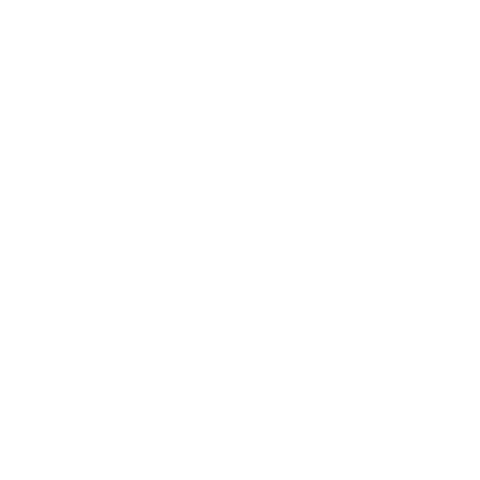

OrderedDict([('Idea of Man', 10), ('Theatre Literature Arts', 8), ('Manners and Customs', 6), ('Structure of Society', 4), ('Fashion', 3), ('Passion', 3), ('Politics', 3), ('Love', 2), ('Philosophy', 2), ('Critics on Nobility', 2), ('Image of Women', 2), ('Law', 2), ('Morale', 2), ('France', 2), ('Science', 1), ('Family', 1), ('Economy', 1), ('Foreign Societies', 1), ('Reason', 1), ('Image of Men', 1), ('Spain', 1), ('Religion', 1), ('Happiness', 1), ('Autopoetical Reflection', 1)])
{'Idea of Man': 10, 'Theatre Literature Arts': 8, 'Manners and Customs': 6, 'Structure of Society': 4, 'Fashion': 3, 'Passion': 3, 'Politics': 3, 'Love': 2, 'Philosophy': 2, 'Image of Women': 2, 'Law': 2, 'Morale': 2, 'Science': 1, 'Family': 1, 'Economy': 1, 'Reason': 1, 'Image of Men': 1, 'Religion': 1, 'Happiness': 1, 'Autopoetical Reflection': 1}
['Idea of Man', 'Theatre Literature Arts', 'Manners and Customs', 'Structure of Society', 'Fashion', 'Passion', 'Politics', 'Love', 'Philosophy', 'Image of Wome

<IPython.core.display.Javascript object>


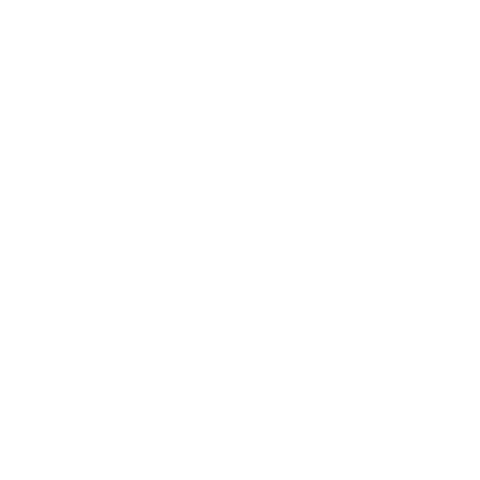

OrderedDict([('Theatre Literature Arts', 7), ('Autopoetical Reflection', 3), ('Image of Women', 3), ('Idea of Man', 3), ('Structure of Society', 1), ('Law', 1)])
{'Theatre Literature Arts': 7, 'Autopoetical Reflection': 3, 'Image of Women': 3, 'Idea of Man': 3, 'Structure of Society': 1, 'Law': 1}
['Theatre Literature Arts', 'Autopoetical Reflection', 'Image of Women', 'Idea of Man', 'Structure of Society', 'Law']
[7, 3, 3, 3, 1, 1]
['#875692', '#A1CAF1', '#F38400', '#F3C300', '#B3446C', '#2B3D26']


<IPython.core.display.Javascript object>


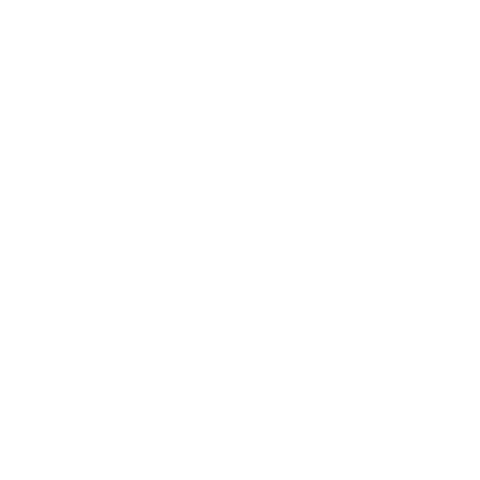

OrderedDict([('Theatre Literature Arts', 8), ('Love', 2), ('Image of Men', 1), ('Image of Women', 1), ('Manners and Customs', 1)])
{'Theatre Literature Arts': 8, 'Love': 2, 'Image of Men': 1, 'Image of Women': 1, 'Manners and Customs': 1}
['Theatre Literature Arts', 'Love', 'Image of Men', 'Image of Women', 'Manners and Customs']
[8, 2, 1, 1, 1]
['#875692', '#C2B280', '#F99379', '#F38400', '#BE0032']


<IPython.core.display.Javascript object>


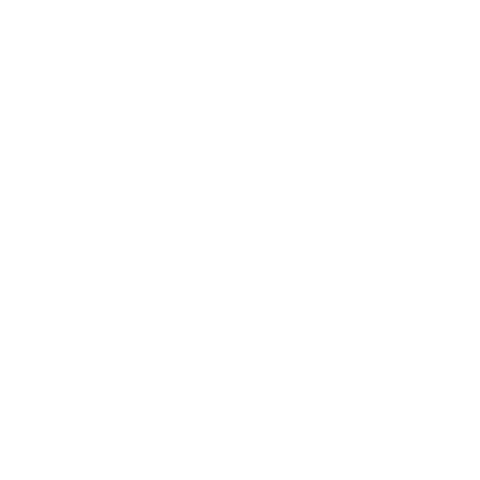

OrderedDict([('Idea of Man', 6), ('Theatre Literature Arts', 4), ('Religion', 2), ('Image of Women', 2), ('Image of Men', 1), ('France', 1)])
{'Idea of Man': 6, 'Theatre Literature Arts': 4, 'Religion': 2, 'Image of Women': 2, 'Image of Men': 1}
['Idea of Man', 'Theatre Literature Arts', 'Religion', 'Image of Women', 'Image of Men']
[6, 4, 2, 2, 1]
['#F3C300', '#875692', '#848482', '#F38400', '#F99379']


<IPython.core.display.Javascript object>


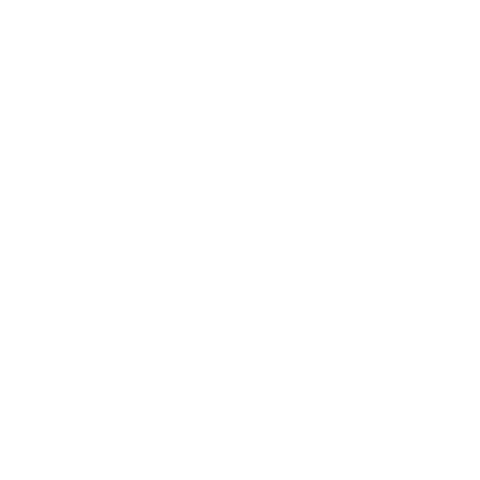

OrderedDict([('Fashion', 4), ('Idea of Man', 2), ('Image of Women', 2), ('Theatre Literature Arts', 2), ('Switzerland', 1), ('France', 1), ('Nature', 1)])
{'Fashion': 4, 'Idea of Man': 2, 'Image of Women': 2, 'Theatre Literature Arts': 2}
['Fashion', 'Idea of Man', 'Image of Women', 'Theatre Literature Arts']
[4, 2, 2, 2]
['#604E97', '#F3C300', '#F38400', '#875692']


<IPython.core.display.Javascript object>


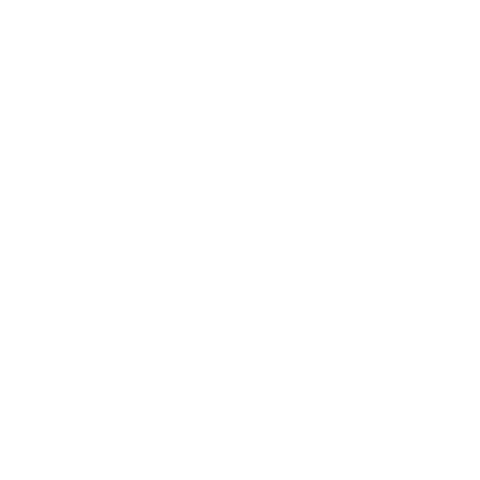

OrderedDict([('Manners and Customs', 2), ('Fashion', 1), ('Image of Women', 1), ('Theatre Literature Arts', 1)])
{'Manners and Customs': 2, 'Fashion': 1, 'Image of Women': 1, 'Theatre Literature Arts': 1}
['Manners and Customs', 'Fashion', 'Image of Women', 'Theatre Literature Arts']
[2, 1, 1, 1]
['#BE0032', '#604E97', '#F38400', '#875692']


<IPython.core.display.Javascript object>


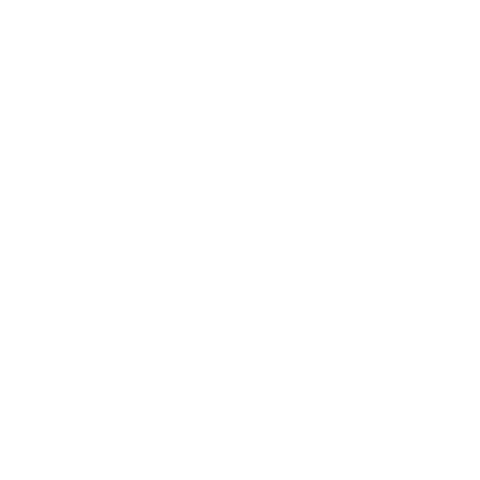

OrderedDict([('Autopoetical Reflection', 1), ('England', 1), ('Education and Formation', 1), ('Family', 1), ('Image of Women', 1), ('Passion', 1), ('Love', 1), ('Idea of Man', 1), ('Fashion', 1), ('Morale', 1), ('Religion', 1), ('Reason', 1)])
{'Autopoetical Reflection': 1, 'Education and Formation': 1, 'Family': 1, 'Image of Women': 1, 'Passion': 1, 'Love': 1, 'Idea of Man': 1, 'Fashion': 1, 'Morale': 1, 'Religion': 1, 'Reason': 1}
['Autopoetical Reflection', 'Education and Formation', 'Family', 'Image of Women', 'Passion', 'Love', 'Idea of Man', 'Fashion', 'Morale', 'Religion', 'Reason']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['#A1CAF1', '#0067A5', '#E25822', '#F38400', '#F2F3F4', '#C2B280', '#F3C300', '#604E97', '#008856', '#848482', '#F6A600']


<IPython.core.display.Javascript object>


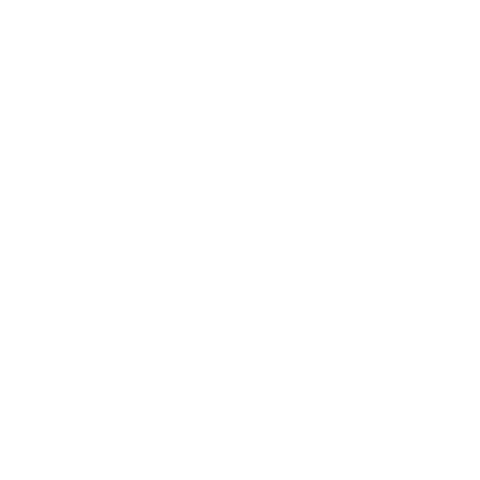

In [99]:
# manually asigned keywords of each periodical
# used in DiSpecs for the Gephi network visualization
for periodical in d_lang.keys():
    periodical_name = periodical
    d_periodical = get_periodical_terms(periodical_name)
    d_periodical = collections.OrderedDict(sorted(d_periodical.items(), key=lambda x:x[1], reverse=True))
    ############## Use this part only if you want to remove the "exclude" items from the visualization
    d_pie = {i:d_periodical[i] for i in d_periodical if i in list(reduced_keywords.keys())}
    ###############
    print(d_periodical)
    print(d_pie)

    # a pie chart for periodical defined in 'periodical name' with transparent background, 
    # where the slices will be ordered and plotted counter-clockwise
    # to use as images for the Gephi network visualization  
    # - no patches and no legend
    labels = []
    sizes = []
    colors = []
    for key, value in d_pie.items():
        labels.append(key)
        sizes.append(value)
    for label in labels:
        if label in all_colors.keys(): 
            colors.append(all_colors.get(label))
    print(labels)
    print(sizes)
    print(colors)
    
    plt.clf() # This method clears the buffer, so images saved with savefig() don't overlap
    fig, ax = plt.subplots(figsize=(4.8, 4.8))
    ax.pie(sizes, autopct=None, colors=colors, shadow=False, startangle=90)
    fig.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    ax.axis('equal')
    ax.margins(0, 0)

    fig.savefig(output+'piecharts/'+ periodical_name + '.png', transparent=True, pad_inches=0,
        bbox_inches='tight', dpi=1200
    )

In [100]:
# All legends only
# used in DiSpecs for the website
import matplotlib.patches as mpatches    
for periodical in d_lang.keys():    
    d = get_periodical_terms(periodical)
    d = collections.OrderedDict(sorted(d.items(), key=lambda x:x[1], reverse=True))
    ############## Use this part only if you want to remove the "exclude" items from the visualization
    d_pie = {i:d[i] for i in d if i in list(reduced_keywords.keys())}
    ###############
    #print(d)
    print(periodical, d_pie)
    labels = []
    sizes = []
    handles=[]
    for key, value in d_pie.items():
        labels.append(key)
        sizes.append(value)
    sizes=np.array(sizes)
    percent = 100.*sizes/sizes.sum()
    index = 0
    for label in labels:
        for key, value in all_colors.items():
            if label == key:
                handle = value.split('#')
                handle = mpatches.Patch(color=value, label=key + ' - '+ str(percent[index].round(decimals=2))+ '% (' + str(sizes[index]) + ')', linewidth=5)
                handles.append(handle)
                index +=1

    plt.clf() # This method clears the buffer, so images saved with savefig() don't overlap
    plt.axis("off")
    legend2 = plt.legend(fontsize=10,loc=10, handles=handles,  framealpha=1, shadow=False,title=periodical)
    legend2._legend_box.sep = 20 # distance from the title to the labels
    fig2  = legend2.figure
    fig2.canvas.draw()
    bbox2  = legend2.get_window_extent()
    bbox2 = bbox2.from_extents(*(bbox2.extents + np.array([-5,-5,5,5])))
    bbox2 = bbox2.transformed(fig2.dpi_scale_trans.inverted())
    fig2.savefig(output+'piecharts/'+ periodical + '_legend.png',
                dpi=300, bbox_inches=bbox2)

Le Spectateur ou le Socrate moderne {'Idea of Man': 110, 'Religion': 89, 'Philosophy': 77, 'Image of Women': 69, 'Theatre Literature Arts': 65, 'Love': 35, 'Culture of Conversation': 33, 'Manners and Customs': 30, 'Morale': 29, 'Autopoetical Reflection': 28, 'Education and Formation': 26, 'Image of Men': 23, 'Politics': 21, 'Structure of Society': 19, 'Family': 15, 'Fashion': 14, 'Happiness': 14, 'Science': 12, 'Passion': 12, 'Economy': 6, 'Reason': 4, 'Law': 4}
La Bigarure {'Theatre Literature Arts': 84, 'Image of Women': 37, 'Love': 35, 'Religion': 34, 'Morale': 26, 'Law': 22, 'Structure of Society': 21, 'Image of Men': 18, 'Politics': 15, 'Idea of Man': 14, 'Manners and Customs': 14, 'Science': 9, 'Passion': 9, 'Family': 6, 'Autopoetical Reflection': 6, 'Philosophy': 5, 'Education and Formation': 5, 'Economy': 4, 'Culture of Conversation': 2, 'Reason': 1}
Le Mentor moderne {'Idea of Man': 31, 'Theatre Literature Arts': 25, 'Religion': 24, 'Image of Women': 22, 'Manners and Customs':

Le Spectateur ou le Socrate moderne {'Idea of Man': 110, 'Religion': 89, 'Philosophy': 77, 'Image of Women': 69, 'Theatre Literature Arts': 65, 'Love': 35, 'Culture of Conversation': 33, 'Manners and Customs': 30, 'Morale': 29, 'Autopoetical Reflection': 28, 'Education and Formation': 26, 'Image of Men': 23, 'Politics': 21, 'Structure of Society': 19, 'Family': 15, 'Fashion': 14, 'Happiness': 14, 'Science': 12, 'Passion': 12, 'Economy': 6, 'Reason': 4, 'Law': 4}


<IPython.core.display.Javascript object>


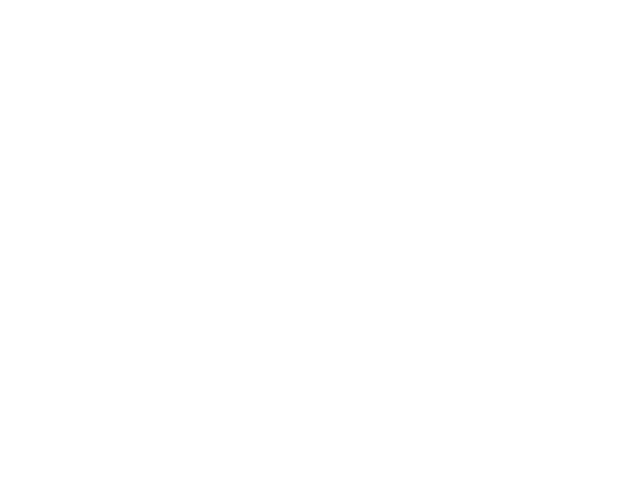

La Bigarure {'Theatre Literature Arts': 84, 'Image of Women': 37, 'Love': 35, 'Religion': 34, 'Morale': 26, 'Law': 22, 'Structure of Society': 21, 'Image of Men': 18, 'Politics': 15, 'Idea of Man': 14, 'Manners and Customs': 14, 'Science': 9, 'Passion': 9, 'Family': 6, 'Autopoetical Reflection': 6, 'Philosophy': 5, 'Education and Formation': 5, 'Economy': 4, 'Culture of Conversation': 2, 'Reason': 1}


<IPython.core.display.Javascript object>


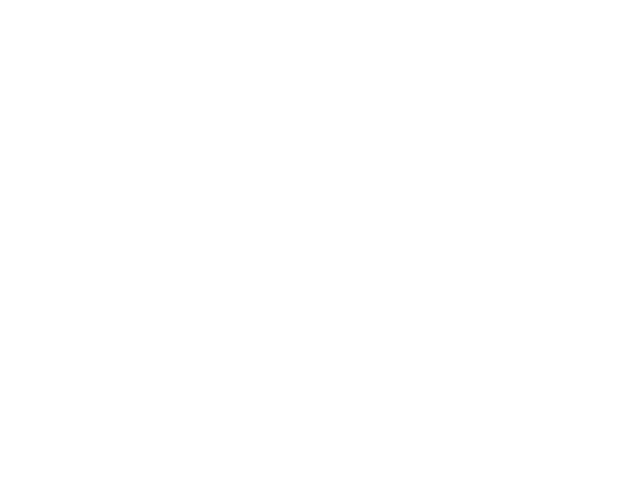

Le Mentor moderne {'Idea of Man': 31, 'Theatre Literature Arts': 25, 'Religion': 24, 'Image of Women': 22, 'Manners and Customs': 21, 'Morale': 18, 'Education and Formation': 15, 'Philosophy': 14, 'Image of Men': 13, 'Love': 13, 'Fashion': 11, 'Autopoetical Reflection': 9, 'Culture of Conversation': 9, 'Structure of Society': 7, 'Happiness': 7, 'Family': 6, 'Reason': 5, 'Passion': 5, 'Law': 3, 'Economy': 2, 'Politics': 2, 'Science': 1}


<IPython.core.display.Javascript object>


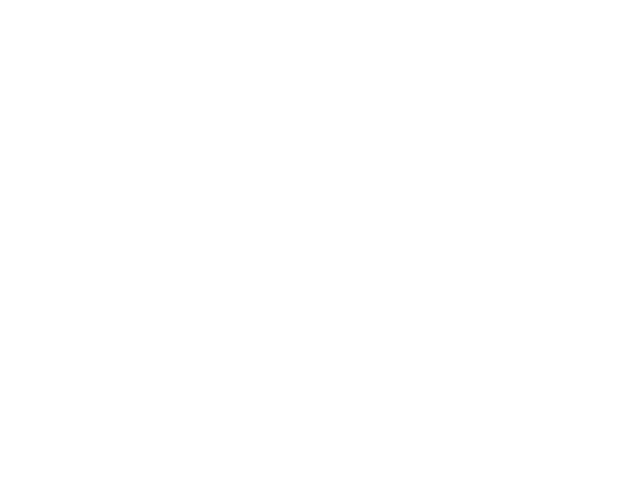

Le Nouveau Spectateur {'Idea of Man': 66, 'Image of Women': 48, 'Love': 45, 'Theatre Literature Arts': 31, 'Autopoetical Reflection': 24, 'Image of Men': 16, 'Family': 16, 'Philosophy': 15, 'Religion': 11, 'Law': 9, 'Morale': 8, 'Structure of Society': 7, 'Culture of Conversation': 7, 'Happiness': 6, 'Economy': 5, 'Fashion': 5, 'Science': 4, 'Education and Formation': 3, 'Manners and Customs': 2, 'Politics': 1}


<IPython.core.display.Javascript object>


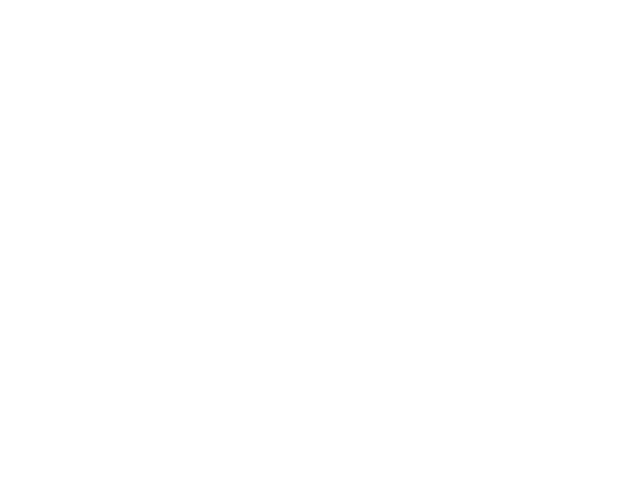

La Bagatelle {'Theatre Literature Arts': 38, 'Idea of Man': 37, 'Autopoetical Reflection': 34, 'Philosophy': 20, 'Image of Women': 17, 'Morale': 13, 'Religion': 12, 'Reason': 12, 'Education and Formation': 9, 'Love': 8, 'Law': 7, 'Culture of Conversation': 7, 'Image of Men': 6, 'Structure of Society': 6, 'Science': 5, 'Happiness': 5, 'Manners and Customs': 3, 'Fashion': 3, 'Economy': 3, 'Family': 3, 'Politics': 2}


<IPython.core.display.Javascript object>


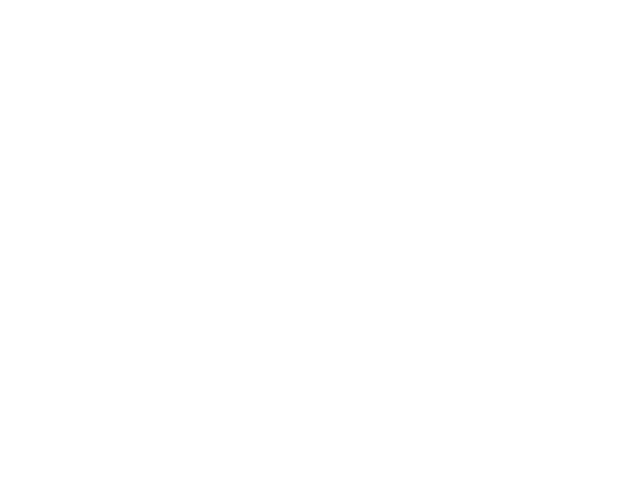

Le Misantrope {'Idea of Man': 45, 'Theatre Literature Arts': 39, 'Religion': 28, 'Autopoetical Reflection': 24, 'Philosophy': 20, 'Image of Women': 14, 'Love': 11, 'Image of Men': 8, 'Fashion': 6, 'Reason': 5, 'Family': 4, 'Economy': 3, 'Law': 3, 'Politics': 3, 'Education and Formation': 3, 'Structure of Society': 2, 'Manners and Customs': 1, 'Happiness': 1, 'Morale': 1}


<IPython.core.display.Javascript object>


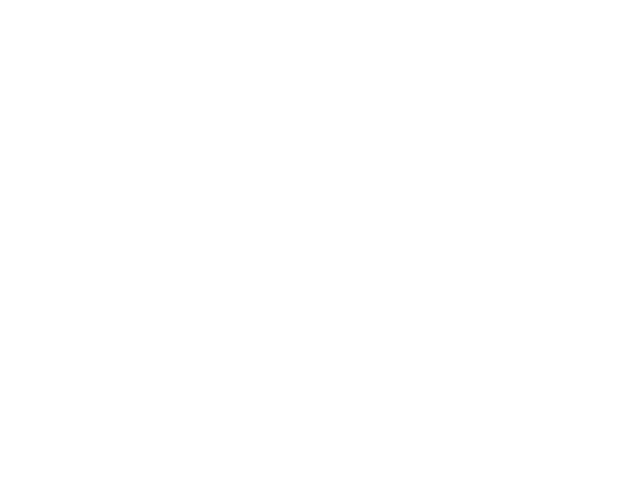

La Spectatrice danoise, ou l'Aspasie moderne {'Manners and Customs': 24, 'Theatre Literature Arts': 22, 'Idea of Man': 18, 'Image of Women': 14, 'Love': 11, 'Philosophy': 11, 'Religion': 10, 'Politics': 9, 'Autopoetical Reflection': 5, 'Structure of Society': 5, 'Reason': 4, 'Image of Men': 3, 'Family': 2, 'Science': 2, 'Fashion': 2, 'Happiness': 1, 'Passion': 1, 'Law': 1}


<IPython.core.display.Javascript object>


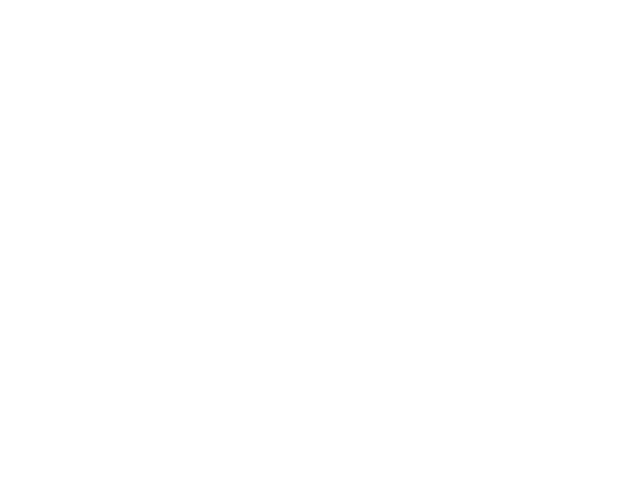

Le Philosophe Nouvelliste {'Idea of Man': 29, 'Theatre Literature Arts': 20, 'Image of Women': 19, 'Autopoetical Reflection': 16, 'Love': 15, 'Politics': 12, 'Image of Men': 12, 'Culture of Conversation': 11, 'Manners and Customs': 9, 'Science': 8, 'Law': 6, 'Passion': 5, 'Education and Formation': 4, 'Structure of Society': 4, 'Philosophy': 3, 'Morale': 3, 'Family': 2, 'Religion': 1, 'Fashion': 1, 'Economy': 1}


<IPython.core.display.Javascript object>


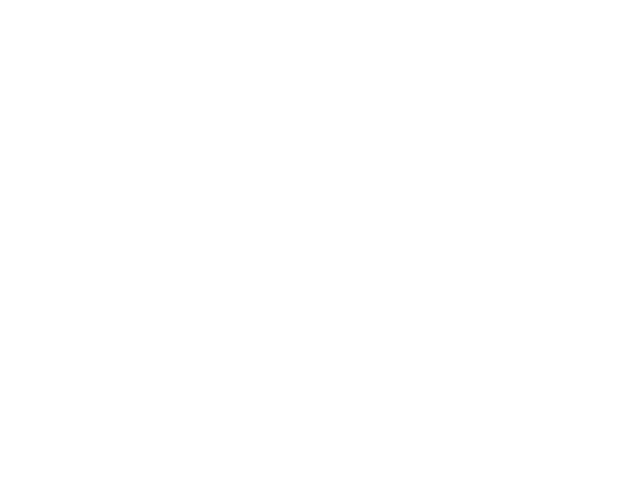

Le Spectateur français avant la Révolution {'Idea of Man': 16, 'Image of Women': 14, 'Structure of Society': 12, 'Autopoetical Reflection': 11, 'Love': 10, 'Theatre Literature Arts': 10, 'Philosophy': 7, 'Passion': 6, 'Morale': 6, 'Family': 5, 'Manners and Customs': 5, 'Politics': 5, 'Image of Men': 5, 'Law': 4, 'Religion': 3, 'Happiness': 3, 'Science': 3, 'Education and Formation': 2, 'Reason': 1}


<IPython.core.display.Javascript object>


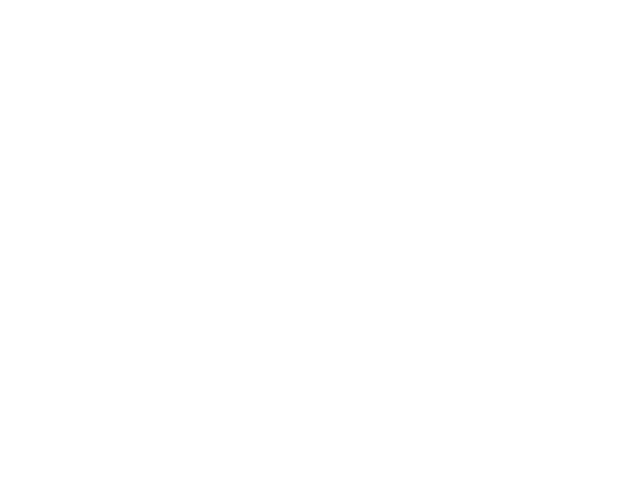

Le Monde comme il est {'Idea of Man': 47, 'Image of Women': 38, 'Love': 29, 'Theatre Literature Arts': 21, 'Education and Formation': 19, 'Reason': 16, 'Autopoetical Reflection': 14, 'Happiness': 13, 'Passion': 12, 'Image of Men': 9, 'Law': 9, 'Philosophy': 6, 'Religion': 5, 'Family': 5, 'Morale': 4, 'Science': 4, 'Economy': 3, 'Politics': 1, 'Structure of Society': 1}


<IPython.core.display.Javascript object>


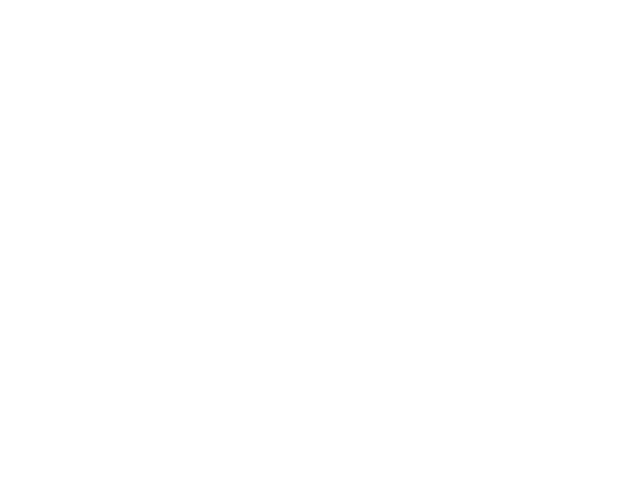

Le Nouveau Spectateur français {'Idea of Man': 18, 'Theatre Literature Arts': 17, 'Religion': 16, 'Image of Women': 13, 'Philosophy': 10, 'Autopoetical Reflection': 7, 'Love': 7, 'Family': 7, 'Image of Men': 4, 'Education and Formation': 4, 'Morale': 2, 'Fashion': 2, 'Economy': 1, 'Science': 1}


<IPython.core.display.Javascript object>


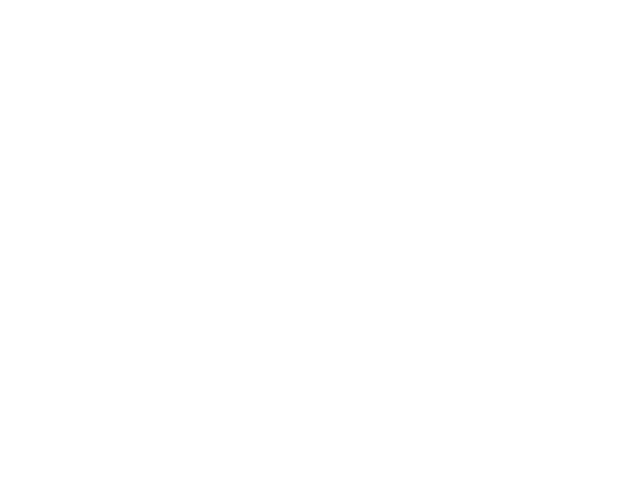

Le Censeur ou Caractères des Mœurs de la Haye {'Idea of Man': 16, 'Manners and Customs': 15, 'Image of Women': 8, 'Religion': 6, 'Theatre Literature Arts': 5, 'Family': 5, 'Image of Men': 5, 'Autopoetical Reflection': 4, 'Love': 3, 'Education and Formation': 2, 'Science': 1, 'Happiness': 1}


<IPython.core.display.Javascript object>


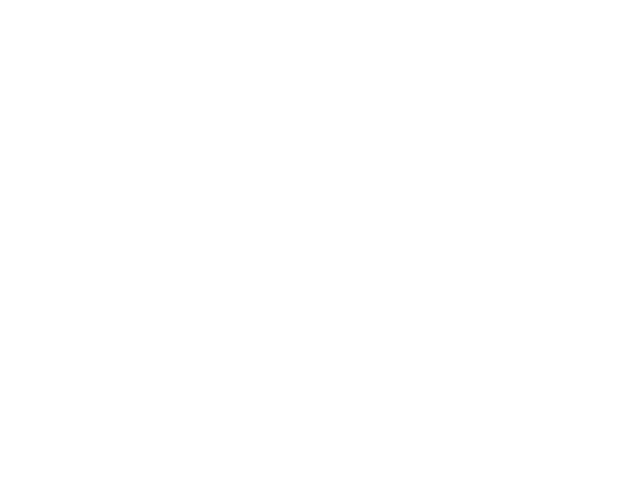

Le Spectateur françois pendant le gouvernement révolutionnaire {'Politics': 11, 'Law': 9, 'Structure of Society': 6, 'Idea of Man': 6, 'Image of Women': 5, 'Religion': 4, 'Morale': 3, 'Education and Formation': 3, 'Theatre Literature Arts': 3, 'Economy': 3, 'Autopoetical Reflection': 2, 'Happiness': 2, 'Family': 2, 'Manners and Customs': 2, 'Philosophy': 1, 'Love': 1}


<IPython.core.display.Javascript object>


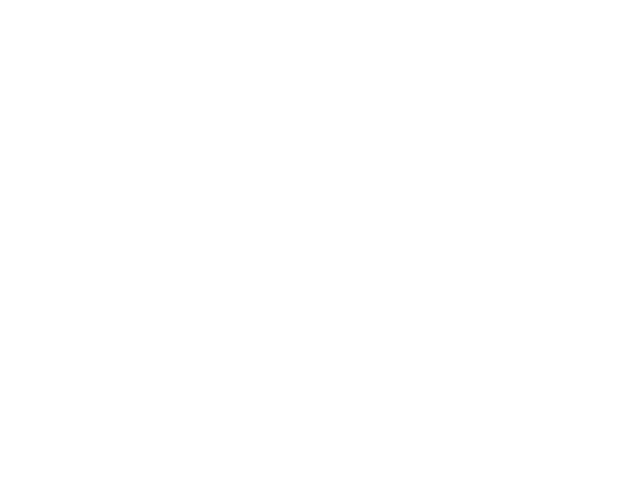

Le Monde {'Love': 14, 'Image of Women': 11, 'Autopoetical Reflection': 8, 'Theatre Literature Arts': 8, 'Idea of Man': 6, 'Morale': 6, 'Passion': 6, 'Structure of Society': 4, 'Family': 3, 'Happiness': 3, 'Politics': 3, 'Religion': 2, 'Manners and Customs': 2, 'Image of Men': 2, 'Philosophy': 1, 'Reason': 1}


<IPython.core.display.Javascript object>


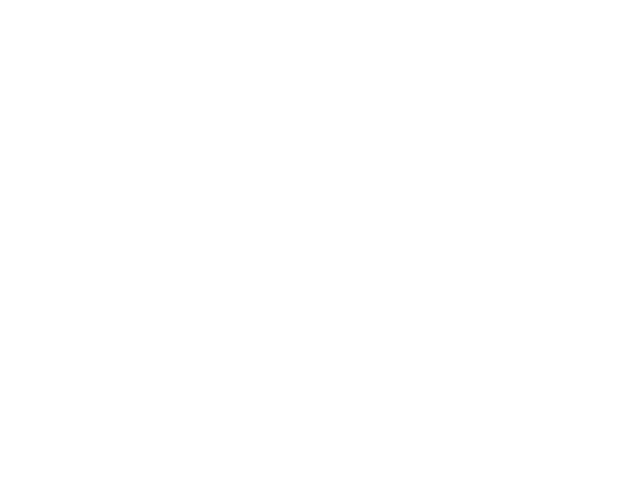

Le Spectateur françois {'Image of Women': 9, 'Love': 6, 'Religion': 6, 'Idea of Man': 5, 'Education and Formation': 4, 'Autopoetical Reflection': 3, 'Theatre Literature Arts': 1, 'Image of Men': 1, 'Reason': 1}


<IPython.core.display.Javascript object>


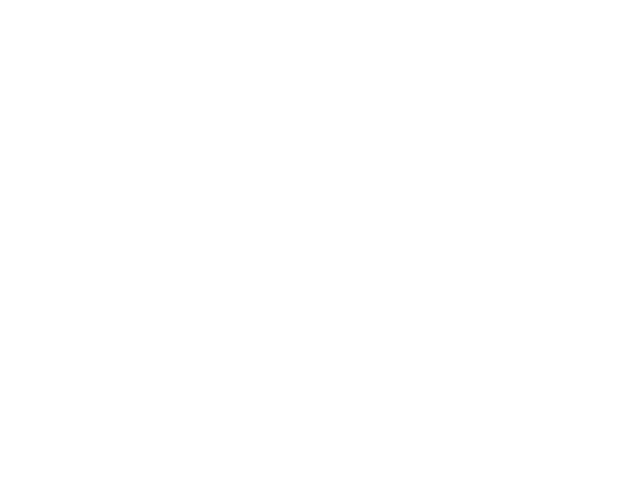

La Spectatrice. Ouvrage traduit de l'anglois {'Image of Women': 15, 'Love': 12, 'Education and Formation': 9, 'Idea of Man': 9, 'Morale': 9, 'Autopoetical Reflection': 8, 'Family': 8, 'Manners and Customs': 7, 'Passion': 6, 'Fashion': 6, 'Reason': 6, 'Image of Men': 3, 'Theatre Literature Arts': 3, 'Religion': 3, 'Philosophy': 3, 'Science': 1, 'Politics': 1, 'Happiness': 1}


<IPython.core.display.Javascript object>


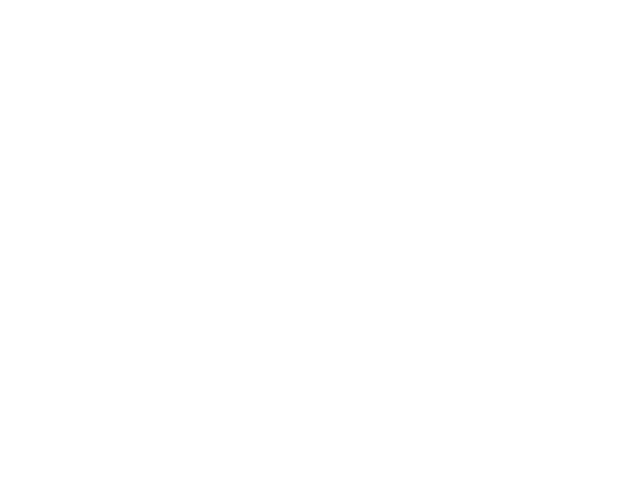

Le Spectateur françois ou le nouveau Socrate moderne {'Politics': 16, 'Theatre Literature Arts': 4, 'Autopoetical Reflection': 3, 'Economy': 3, 'Idea of Man': 2, 'Image of Women': 2, 'Image of Men': 1, 'Education and Formation': 1, 'Manners and Customs': 1}


<IPython.core.display.Javascript object>


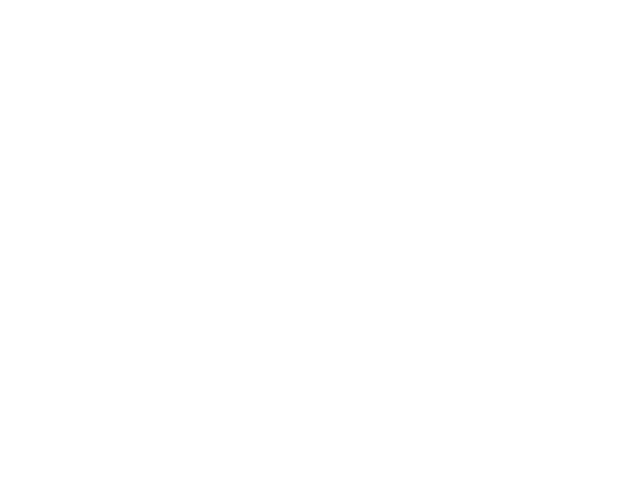

La Spectatrice {'Image of Women': 8, 'Idea of Man': 6, 'Theatre Literature Arts': 4, 'Autopoetical Reflection': 4, 'Fashion': 4, 'Morale': 3, 'Image of Men': 3, 'Philosophy': 3, 'Love': 2, 'Religion': 2, 'Structure of Society': 1, 'Happiness': 1, 'Law': 1, 'Politics': 1, 'Culture of Conversation': 1, 'Family': 1, 'Education and Formation': 1, 'Reason': 1}


<IPython.core.display.Javascript object>


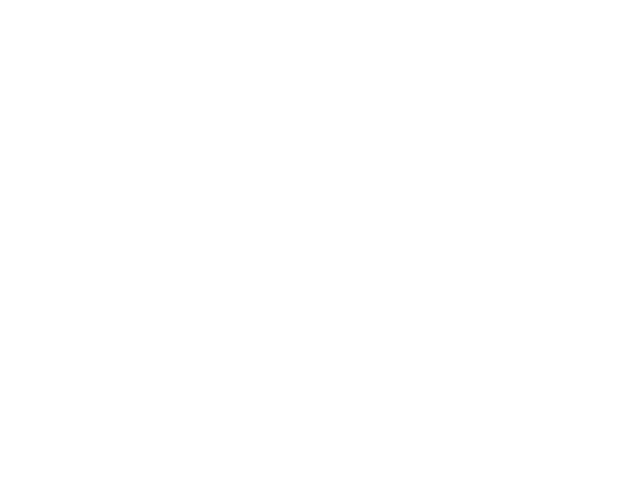

Le Spectateur françois, ou Journal des Mœurs {'Idea of Man': 10, 'Theatre Literature Arts': 8, 'Manners and Customs': 6, 'Structure of Society': 4, 'Fashion': 3, 'Passion': 3, 'Politics': 3, 'Love': 2, 'Philosophy': 2, 'Image of Women': 2, 'Law': 2, 'Morale': 2, 'Science': 1, 'Family': 1, 'Economy': 1, 'Reason': 1, 'Image of Men': 1, 'Religion': 1, 'Happiness': 1, 'Autopoetical Reflection': 1}


<IPython.core.display.Javascript object>


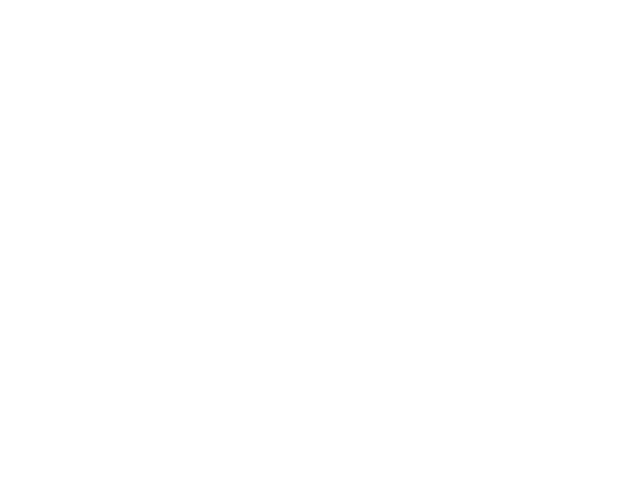

Le Cabinet du Philosophe {'Theatre Literature Arts': 7, 'Autopoetical Reflection': 3, 'Image of Women': 3, 'Idea of Man': 3, 'Structure of Society': 1, 'Law': 1}


<IPython.core.display.Javascript object>


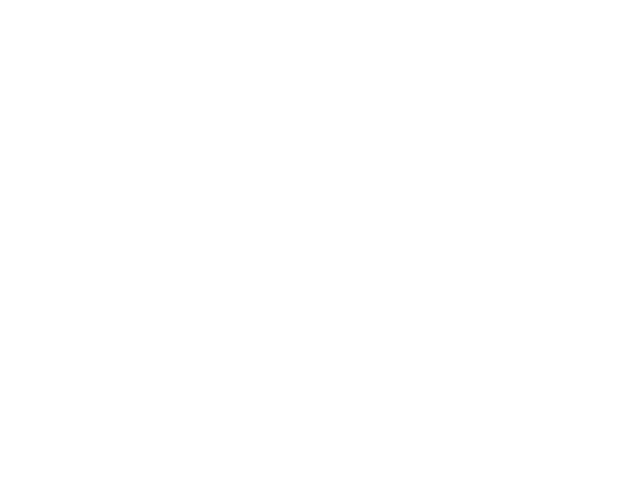

Le Spectateur inconnu {'Theatre Literature Arts': 8, 'Love': 2, 'Image of Men': 1, 'Image of Women': 1, 'Manners and Customs': 1}


<IPython.core.display.Javascript object>


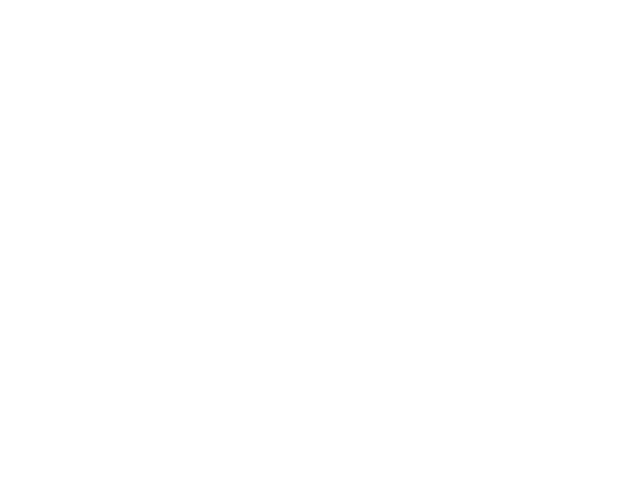

L'Indigent philosophe ou l'homme sans souci {'Idea of Man': 6, 'Theatre Literature Arts': 4, 'Religion': 2, 'Image of Women': 2, 'Image of Men': 1}


<IPython.core.display.Javascript object>


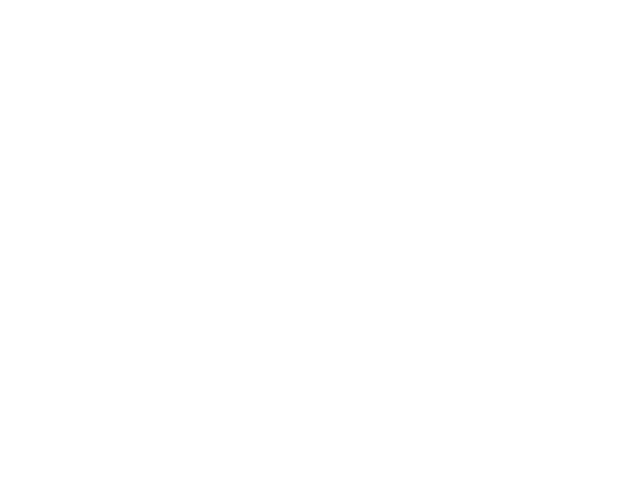

Le Spectateur suisse {'Fashion': 4, 'Idea of Man': 2, 'Image of Women': 2, 'Theatre Literature Arts': 2}


<IPython.core.display.Javascript object>


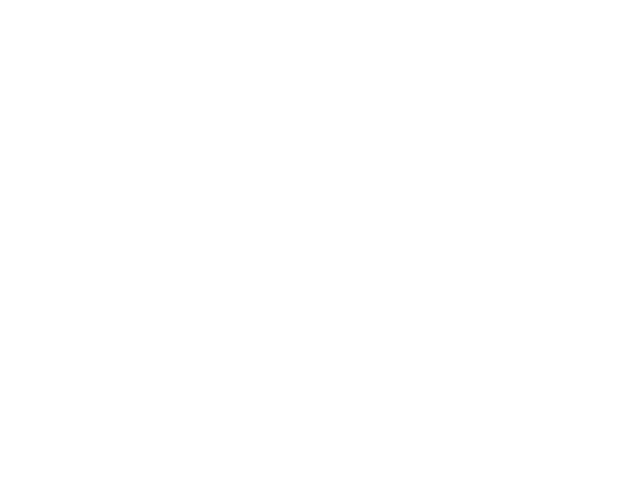

Les Chiffons {'Manners and Customs': 2, 'Fashion': 1, 'Image of Women': 1, 'Theatre Literature Arts': 1}


<IPython.core.display.Javascript object>


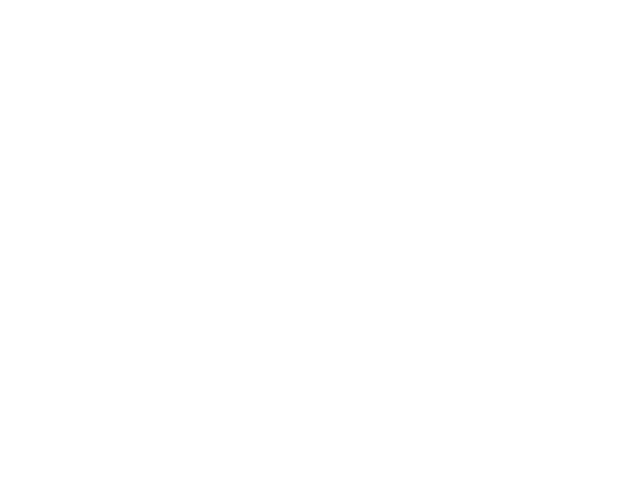

Le Spectateur moderne {'Autopoetical Reflection': 1, 'Education and Formation': 1, 'Family': 1, 'Image of Women': 1, 'Passion': 1, 'Love': 1, 'Idea of Man': 1, 'Fashion': 1, 'Morale': 1, 'Religion': 1, 'Reason': 1}


<IPython.core.display.Javascript object>


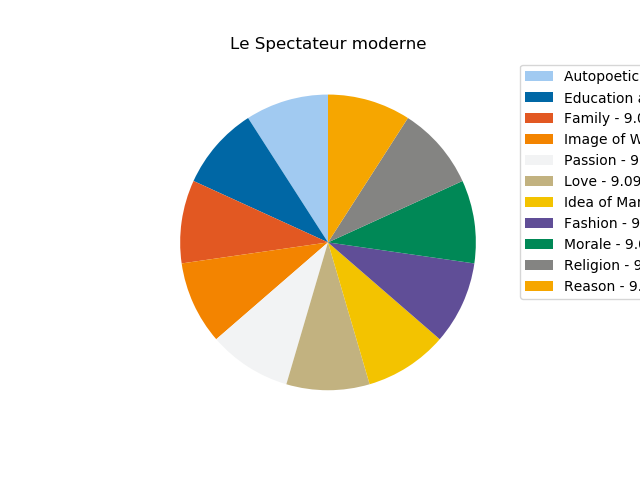

In [101]:
# Same pie charts, but with legends
for periodical in d_lang.keys():    
    d = get_periodical_terms(periodical)
    d = collections.OrderedDict(sorted(d.items(), key=lambda x:x[1], reverse=True))
    ############## Use this part only if you want to remove the "exclude" items from the visualization
    d_pie = {i:d[i] for i in d if i in list(reduced_keywords.keys())}
    ###############
    #print(d)
    print(periodical, d_pie)
    labels = []
    sizes = []
    colors = []
    for key, value in d_pie.items():
        labels.append(key)
        sizes.append(value)
    for label in labels:
        if label in all_colors.keys(): 
            colors.append(all_colors.get(label))
    sizes=np.array(sizes)
    porcent = 100.*sizes/sizes.sum()
     
    plt.clf() # This method clears the buffer, so images saved with savefig() don't overlap
    fig, ax = plt.subplots()
    patches, texts = ax.pie(sizes, colors=colors, shadow=False, startangle=90) 
    labels = ['{0} - {1:1.2f} % ({2})'.format(i,j,k) for i,j,k in zip(labels, porcent, sizes)]
    ax.set_title(periodical)
    plt.legend(patches, labels,fontsize=10,bbox_to_anchor=(1, 1))  
    fig.savefig(output+'piecharts/'+ periodical + '_labeled.png', transparent=False, 
        bbox_inches='tight',dpi=1200
    )
